# Modèle de régression de la variable "consommation d'énergie par m2 par an" avec les variables de description des logements

# INTRO : first variable selection

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression


In [82]:
dpe = pd.read_csv("/Users/macbook/Documents/data_science_master/fil_rouge/DPE-Zip/dpe-v2-logements-existants-random.csv")

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (11,29,30,218,219,220,221,222,226) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [83]:
list(dpe.columns)

['N°DPE',
 'Date_réception_DPE',
 'Date_établissement_DPE',
 'Date_visite_diagnostiqueur',
 'Modèle_DPE',
 'N°_DPE_remplacé',
 'Date_fin_validité_DPE',
 'Version_DPE',
 'N°_DPE_immeuble_associé',
 'Appartement_non_visité_(0/1)',
 'Méthode_application_DPE',
 'N°_immatriculation_copropriété',
 'Invariant_fiscal_logement',
 'N°_RPLS_logement',
 'Etiquette_GES',
 'Etiquette_DPE',
 'Année_construction',
 'Type_bâtiment',
 'Type_installation_chauffage',
 'Type_installation_ECS_(général)',
 'Période_construction',
 'Hauteur_sous-plafond',
 'Nombre_appartement',
 'Nombre_niveau_immeuble',
 'Nombre_niveau_logement',
 'Surface_habitable_immeuble',
 'Surface_habitable_logement',
 'Surface_tertiaire_immeuble',
 'Classe_inertie_bâtiment',
 'Typologie_logement',
 'Position_logement_dans_immeuble',
 'Classe_altitude',
 'Zone_climatique_',
 'Adresse_brute',
 'Nom__commune_(BAN)',
 'Code_INSEE_(BAN)',
 'N°_voie_(BAN)',
 'Identifiant__BAN',
 'Adresse_(BAN)',
 'Code_postal_(BAN)',
 'Score_BAN',
 'Nom__ru

In [84]:
dpe.shape

(93605, 242)

In [85]:
dpe.head()

,N°DPE,Date_réception_DPE,Date_établissement_DPE,Date_visite_diagnostiqueur,Modèle_DPE,N°_DPE_remplacé,Date_fin_validité_DPE,Version_DPE,N°_DPE_immeuble_associé,Appartement_non_visité_(0/1),...,Type_générateur_froid,Surface_climatisée,Type_énergie_climatisation,Catégorie_ENR,Electricité_PV_autoconsommée,Système_production_électricité_origine_renouvelable,Présence_production_PV_(0/1),Production_électricité_PV_(kWhep/an),Surface_totale_capteurs_photovoltaïque,Nombre_module
0,2367E0834111W,2023-03-14,2023-03-13,2023-03-13,DPE 3CL 2021 méthode logement,NaN,2033-03-12,2.2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Solaire Photovoltaïque,1.0,0.0,NaN,2.0
1,2335E2194416B,2023-06-29,2023-06-28,2023-06-28,DPE 3CL 2021 méthode logement,NaN,2033-06-27,2.3,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,Solaire Photovoltaïque,0.0,0.0,NaN,NaN
2,2465E3436371T,2024-10-01,2024-09-30,2024-09-30,DPE 3CL 2021 méthode logement,NaN,2034-09-29,2.4,NaN,NaN,...,NaN,NaN,NaN,Il existe plusieurs descriptifs ENR,NaN,Solaire Photovoltaïque,1.0,4728.7,9.6,8.0
3,2344E0822003H,2023-03-13,2023-03-12,2023-03-12,DPE 3CL 2021 méthode logement,NaN,2033-03-11,2.2,NaN,NaN,...,NaN,NaN,NaN,Il existe plusieurs descriptifs ENR,NaN,Solaire Photovoltaïque,1.0,6186.9,20.0,NaN
4,2330E0798770E,2023-03-10,2023-03-09,2023-03-09,DPE 3CL 2021 méthode logement,NaN,2033-03-08,2.2,NaN,NaN,...,PAC air/eau installée après 2017,182.6,Électricité,Il existe plusieurs descriptifs ENR,NaN,Solaire Photovoltaïque,1.0,6029.1,16.0,10.0


In [86]:
# remplacer les chaînes vides par NaN
dpe_replaced = dpe.replace("", np.nan)

In [87]:
print(min(dpe_replaced['Date_réception_DPE']))
print(max(dpe_replaced['Date_réception_DPE']))

2021-07-01
2024-11-18


In [88]:
dpe_replaced['Type_bâtiment'].value_counts(dropna = False)

maison    93605
Name: Type_bâtiment, dtype: int64

In [89]:
dpe_replaced['Etiquette_DPE'].value_counts(dropna = False)

C    41408
D    26754
B    12441
A     7419
E     5078
F      408
G       97
Name: Etiquette_DPE, dtype: int64

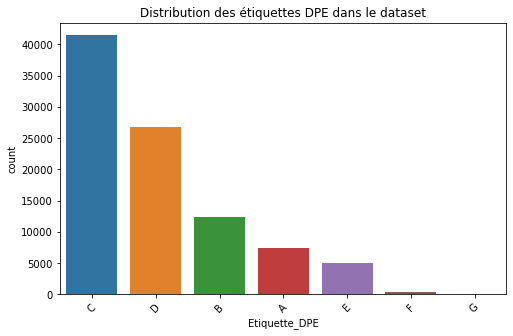

In [90]:
plt.figure(figsize=(8, 5))
sns.countplot(x=dpe_replaced['Etiquette_DPE'], order=dpe_replaced['Etiquette_DPE'].value_counts().index)
plt.title(f'Distribution des étiquettes DPE dans le dataset')
plt.xticks(rotation=45) 
plt.show()

In [91]:
dpe_replaced.isnull().sum().sum() / dpe_replaced.size * 100

37.906478824990366

In [92]:
# calculer le nombre de valeurs manquantes par colonne
missing_counts = dpe_replaced.isna().sum()

# Étape 4 : calculer le pourcentage de valeurs manquantes par colonne
missing_percent = (missing_counts / len(dpe)) * 100

# Étape 5 : combiner les informations dans un DataFrame récapitulatif
missing_info = pd.DataFrame({
    'nb_valeurs_manquantes': missing_counts,
    '%_valeurs_manquantes': missing_percent
})

# Afficher le résultat
print(missing_info)

                                                    nb_valeurs_manquantes  \
N°DPE                                                                   0   
Date_réception_DPE                                                      0   
Date_établissement_DPE                                                  0   
Date_visite_diagnostiqueur                                              0   
Modèle_DPE                                                              0   
...                                                                   ...   
Système_production_électricité_origine_renouvel...                  67916   
Présence_production_PV_(0/1)                                        67483   
Production_électricité_PV_(kWhep/an)                                    0   
Surface_totale_capteurs_photovoltaïque                              88569   
Nombre_module                                                       89801   

                                                    %_valeurs_manquantes  


In [93]:
# Supprimons les colonnes qui ont plus de 80% de valeurs manquantes :
seuil = 70

# Filtrer les colonnes en dessous du seuil
colonnes_a_conserver = missing_percent[missing_percent <= seuil].index

# Créer un nouveau DataFrame sans les colonnes au-dessus du seuil
dpe_filtered = dpe_replaced[colonnes_a_conserver]

# Afficher le DataFrame filtré
print(dpe_filtered.shape)

(93605, 154)


In [94]:
dpe_filtered.columns = list(map(lambda x: x.lower(), dpe_filtered.columns))

In [95]:
list(dpe_filtered.columns)

['n°dpe',
 'date_réception_dpe',
 'date_établissement_dpe',
 'date_visite_diagnostiqueur',
 'modèle_dpe',
 'date_fin_validité_dpe',
 'version_dpe',
 'méthode_application_dpe',
 'etiquette_ges',
 'etiquette_dpe',
 'année_construction',
 'type_bâtiment',
 'période_construction',
 'hauteur_sous-plafond',
 'nombre_niveau_logement',
 'surface_habitable_logement',
 'classe_inertie_bâtiment',
 'classe_altitude',
 'zone_climatique_',
 'adresse_brute',
 'nom__commune_(ban)',
 'code_insee_(ban)',
 'n°_voie_(ban)',
 'identifiant__ban',
 'adresse_(ban)',
 'code_postal_(ban)',
 'score_ban',
 'nom__rue_(ban)',
 'coordonnée_cartographique_x_(ban)',
 'coordonnée_cartographique_y_(ban)',
 'code_postal_(brut)',
 'n°_étage_appartement',
 "complément_d'adresse_bâtiment",
 'statut_géocodage',
 'n°_département_(ban)',
 'n°_région_(ban)',
 'conso_5_usages_é_finale',
 'conso_5_usages/m²_é_finale',
 'conso_chauffage_é_finale',
 'conso_chauffage_dépensier_é_finale',
 'conso_éclairage_é_finale',
 'conso_ecs_é_fi

In [96]:
# On peut déjà dire que certaines variables seront inutiles à notre tâche ou redondantes :
# On ne garde que les CARACTERISTIQUES du logement
# Normal que le coût du chauffage soit corrélé à la conso par exemple... Ne nous dit rien 

useless_col = ['n°dpe',
 'date_réception_dpe',
 'date_établissement_dpe',
 'date_visite_diagnostiqueur',
 'modèle_dpe',
 'date_fin_validité_dpe',
 'version_dpe',
 'méthode_application_dpe',
 'adresse_brute',
 'nom__commune_(ban)',
 'code_insee_(ban)',
 'n°_voie_(ban)',
 'identifiant__ban',
 'adresse_(ban)',
 'code_postal_(ban)',
 'nom__rue_(ban)',
 'coordonnée_cartographique_x_(ban)',
 'coordonnée_cartographique_y_(ban)',
 'code_postal_(brut)',
 "complément_d'adresse_bâtiment",
 'n°_département_(ban)',
 'conso_5_usages_é_finale',
 'conso_chauffage_é_finale',
 'conso_chauffage_dépensier_é_finale',
 'conso_éclairage_é_finale',
 'conso_ecs_é_finale',
 'conso_ecs_dépensier_é_finale',
 'conso_refroidissement_é_finale',
 'conso_refroidissement_dépensier_é_finale',
 'conso_auxiliaires_é_finale',
 'conso_5_usages_é_primaire',
 'conso_5_usages_par_m²_é_primaire',
 'conso_chauffage_é_primaire',
 'conso_chauffage_dépensier_é_primaire',
 'conso_éclairage_é_primaire',
 'conso_ecs_é_primaire',
 'conso_ecs_dépensier_é_primaire',
 'conso_refroidissement_é_primaire',
 'conso_refroidissement_dépensier_é_primaire',
 'conso_auxiliaires_é_primaire',
 'emission_ges_5_usages',
 'emission_ges_5_usages_par_m²',
 'emission_ges_chauffage',
 'emission_ges_chauffage_dépensier',
 'emission_ges_éclairage',
 'emission_ges_ecs',
 'emission_ges_ecs_dépensier',
 'emission_ges_refroidissement',
 'emission_ges_refroidissement_dépensier',
 'emission_ges_auxiliaires',
 'conso_5_usages_é_finale_énergie_n°1',
 'conso_chauffage_é_finale_énergie_n°1',
 'conso_ecs_é_finale_énergie_n°1',
 'coût_total_5_usages_énergie_n°1',
 'coût_chauffage_énergie_n°1',
 'coût_ecs_énergie_n°1',
 'emission_ges_5_usages_énergie_n°1',
 'emission_ges_chauffage_énergie_n°1',
 'emission_ges_ecs_énergie_n°1',
 'conso_5_usages_é_finale_énergie_n°2',
 'conso_chauffage_é_finale_énergie_n°2',
 'conso_ecs_é_finale_énergie_n°2',
 'coût_total_5_usages_énergie_n°2',
 'coût_chauffage_énergie_n°2',
 'coût_ecs_énergie_n°2',
 'emission_ges_5_usages_énergie_n°2',
 'emission_ges_chauffage_énergie_n°2',
 'emission_ges_ecs_énergie_n°2',
 'coût_total_5_usages',
 'coût_chauffage',
 'coût_chauffage_dépensier',
 'coût_éclairage',
 'coût_ecs',
 'coût_ecs_dépensier',
 'coût_refroidissement',
 'coût_refroidissement_dépensier',
 'coût_auxiliaires',
 'besoin_chauffage',
 'besoin_ecs',
 'besoin_refroidissement',
 'besoin_refroidissement_dépensier',
 'conso_chauffage_installation_chauffage_n°1',
 'conso_chauffage_dépensier_installation_chauffage_n°1',
 'description_installation_chauffage_n°1',
 'description_générateur_chauffage_n°1_installation_n°1',
 'conso_chauffage_générateur_n°1_installation_n°1',
 'conso_chauffage_dépensier_générateur_n°1_installation_n°1',
 'conso_é_finale_installation_ecs',
 'conso_é_finale_dépensier_installation_ecs',
 'description_installation_ecs',
 'conso_é_finale_générateur_ecs_n°1',
 'conso_é_finale_dépensier_générateur_ecs_n°1',
 'description_générateur_ecs_n°1',
 'type_bâtiment', 'statut_géocodage','etiquette_ges']


dpe_filtered = dpe_filtered.drop(columns=useless_col)


In [97]:
dpe_filtered.shape

(93605, 58)

In [98]:
doublons = dpe_filtered.duplicated().sum()
print(f"Nombre de doublons dans le DataFrame : {doublons}")

Nombre de doublons dans le DataFrame : 5649


In [99]:
dpe_unique = dpe_filtered.drop_duplicates()

In [100]:
dpe_unique.shape

(87956, 58)

In [101]:
list(dpe_unique.columns)

['etiquette_dpe',
 'année_construction',
 'période_construction',
 'hauteur_sous-plafond',
 'nombre_niveau_logement',
 'surface_habitable_logement',
 'classe_inertie_bâtiment',
 'classe_altitude',
 'zone_climatique_',
 'score_ban',
 'n°_étage_appartement',
 'n°_région_(ban)',
 'conso_5_usages/m²_é_finale',
 'type_énergie_n°1',
 'type_énergie_n°2',
 'logement_traversant_(0/1)',
 'présence_brasseur_air_(0/1)',
 'indicateur_confort_été',
 'isolation_toiture_(0/1)',
 'protection_solaire_exterieure_(0/1)',
 'inertie_lourde_(0/1)',
 'deperditions_baies_vitrées',
 'deperditions_enveloppe',
 'déperditions_murs',
 'deperditions_planchers_bas',
 'deperditions_planchers_hauts',
 'déperditions_ponts_thermiques',
 'déperditions_portes',
 'déperditions_renouvellement_air',
 'qualité_isolation_enveloppe',
 'qualité_isolation_menuiseries',
 'qualité_isolation_murs',
 'qualité_isolation_plancher_bas',
 'ubat_w/m²_k',
 'qualité_isolation_plancher_haut_comble_perdu',
 'apports_internes_saison_chauffe_',


# DATA TYPES

In [102]:
pd.DataFrame(dpe_unique.dtypes, columns=['type'])

,type
etiquette_dpe,object
année_construction,int64
période_construction,object
hauteur_sous-plafond,float64
nombre_niveau_logement,float64
surface_habitable_logement,float64
classe_inertie_bâtiment,object
classe_altitude,object
zone_climatique_,object
score_ban,float64


In [103]:
# Séparer les colonnes numériques et catégoriques
colonnes_numeriques = dpe_unique.select_dtypes(include=['float64', 'int64']).columns
colonnes_categoriques = dpe_unique.select_dtypes(include=['object', 'category']).columns

In [104]:
for col in colonnes_categoriques :
    print(f"Valeurs de la variables : {col}")
    print(dpe_unique[col].value_counts(dropna=False))

Valeurs de la variables : etiquette_dpe
C    38452
D    25259
B    11764
A     7173
E     4827
F      389
G       92
Name: etiquette_dpe, dtype: int64
Valeurs de la variables : période_construction
2006-2012     36435
2013-2021     21796
2001-2005     20420
après 2021     5048
1989-2000      4213
avant 1948       19
1948-1974        10
1978-1982        10
1983-1988         5
Name: période_construction, dtype: int64
Valeurs de la variables : classe_inertie_bâtiment
Légère         39629
Moyenne        35237
Lourde          9459
NaN             2959
Très lourde      672
Name: classe_inertie_bâtiment, dtype: int64
Valeurs de la variables : classe_altitude
inférieur à 400m    81916
400-800m             4076
NaN                   989
supérieur à 800m      975
Name: classe_altitude, dtype: int64
Valeurs de la variables : zone_climatique_
H1a    18665
H2b    15550
H2c    13306
H3     10902
H1c    10281
H1b     7672
H2a     7646
H2d     2945
NaN      989
Name: zone_climatique_, dtype: int64
Val

In [105]:
# Trouver les colonnes catégoriqes avec plus de 10 valeurs uniques

print(colonnes_categoriques)

Index(['etiquette_dpe', 'période_construction', 'classe_inertie_bâtiment',
       'classe_altitude', 'zone_climatique_', 'type_énergie_n°1',
       'type_énergie_n°2', 'indicateur_confort_été',
       'qualité_isolation_enveloppe', 'qualité_isolation_menuiseries',
       'qualité_isolation_murs', 'qualité_isolation_plancher_bas',
       'qualité_isolation_plancher_haut_comble_perdu',
       'type_énergie_principale_chauffage',
       'configuration_installation_chauffage_n°1',
       'type_installation_chauffage_n°1',
       'type_émetteur_installation_chauffage_n°1',
       'type_énergie_générateur_n°1_installation_n°1',
       'type_générateur_n°1_installation_n°1',
       'usage_générateur_n°1_installation_n°1', 'type_énergie_principale_ecs',
       'configuration_installation_ecs', 'type_installation_ecs',
       'type_énergie_générateur_ecs_n°1', 'type_générateur_ecs_n°1',
       'usage_générateur_ecs_n°1', 'catégorie_enr'],
      dtype='object')


In [106]:
col_too_many_values = ['type_émetteur_installation_chauffage_n°1', 'type_générateur_n°1_installation_n°1',
                      'type_générateur_ecs_n°1']

col_cat_ordinal = ['période_construction', 'qualité_isolation_enveloppe',
                   'qualité_isolation_menuiseries', 'qualité_isolation_murs', 
                   'classe_inertie_bâtiment', 'classe_altitude','indicateur_confort_été',
                   'qualité_isolation_plancher_bas','qualité_isolation_plancher_haut_comble_perdu', 'etiquette_dpe']

col_cat_nominal = ['zone_climatique_','type_énergie_n°1','type_énergie_n°2','type_énergie_principale_chauffage',
                   'configuration_installation_chauffage_n°1','type_installation_chauffage_n°1',
                   'type_énergie_générateur_n°1_installation_n°1',
                  'usage_générateur_n°1_installation_n°1', 'type_énergie_principale_ecs','configuration_installation_ecs', 'type_installation_ecs',
                   'type_énergie_générateur_ecs_n°1', 'usage_générateur_ecs_n°1', 'catégorie_enr']

In [107]:
dpe_unique = dpe_unique.drop(columns=col_too_many_values)


In [108]:
for col in col_cat_ordinal :
    dpe_unique[col] = dpe_unique[col].fillna("Inconnu")
    print(f"Valeurs de la variables : {col}")
    print(dpe_unique[col].value_counts(dropna=False))

Valeurs de la variables : période_construction
2006-2012     36435
2013-2021     21796
2001-2005     20420
après 2021     5048
1989-2000      4213
avant 1948       19
1948-1974        10
1978-1982        10
1983-1988         5
Name: période_construction, dtype: int64
Valeurs de la variables : qualité_isolation_enveloppe
bonne           37213
très bonne      36822
moyenne          8823
insuffisante     5098
Name: qualité_isolation_enveloppe, dtype: int64
Valeurs de la variables : qualité_isolation_menuiseries
moyenne         37718
bonne           25676
très bonne      21282
insuffisante     3280
Name: qualité_isolation_menuiseries, dtype: int64
Valeurs de la variables : qualité_isolation_murs
bonne           53965
très bonne      25312
moyenne          6364
insuffisante     2315
Name: qualité_isolation_murs, dtype: int64
Valeurs de la variables : classe_inertie_bâtiment
Légère         39629
Moyenne        35237
Lourde          9459
Inconnu         2959
Très lourde      672
Name: classe_

In [109]:
# Dictionnaires de mapping pour chaque colonne ordinale

mapping_etiquette = {          
    "A": 1,
    "B": 2,
    "C": 3,
    "D": 4,
    "E": 5,
    "F": 6,
    "G": 7
}

mapping_periode = {          
    "avant 1948": 1,
    "1948-1974": 2,
    "1975-1982": 3,
    "1983-1988": 4,
    "1989-2000": 5,
    "2001-2005": 6,
    "2006-2012": 7,
    "2013-2021": 8,
    "après 2021": 9
}

mapping_classe_inertie_bâtiment = {
    "Inconnu": 0,
    "Légère": 1,
    "Moyenne": 2,
    "Lourde": 3,
    "Très lourde": 4
}

mapping_classe_altitude = {
    "Inconnu": 0,
    "inférieur à 400m": 1,
    "400-800m": 2,
    "supérieur à 800m": 3
}

mapping_indicateur_confort_été = {
    "Inconnu": 0,
    "insuffisant": 1,
    "moyen": 2,
    "bon": 3
}

mapping_indicateur_qualité_isolation = {
    "Inconnu": 0,
    "insuffisante": 1,
    "moyenne": 2,
    "bonne": 3,
    "très bonne": 4
}

# Colonnes catégoriques ordinales et leurs mappings
colonnes_ordinales = {
    "classe_inertie_bâtiment": mapping_classe_inertie_bâtiment,
    "classe_altitude": mapping_classe_altitude,
    "indicateur_confort_été" : mapping_indicateur_confort_été,
    "qualité_isolation_plancher_bas" : mapping_indicateur_qualité_isolation,
    "qualité_isolation_plancher_haut_comble_perdu" : mapping_indicateur_qualité_isolation,
    "qualité_isolation_enveloppe" : mapping_indicateur_qualité_isolation,
    "qualité_isolation_menuiseries" : mapping_indicateur_qualité_isolation,
    "qualité_isolation_murs" : mapping_indicateur_qualité_isolation,
    "période_construction" : mapping_periode,
    "etiquette_dpe" : mapping_etiquette
} 

# Transformation des colonnes ordinales en numériques
for col, mapping in colonnes_ordinales.items():
    dpe_unique[col] = dpe_unique[col].map(mapping)

# Vérification
print(dpe_unique.head())

   etiquette_dpe  année_construction  période_construction  \
0              4                2007                   7.0   
1              3                2001                   6.0   
2              3                2012                   7.0   
3              3                2012                   7.0   
4              2                2009                   7.0   

   hauteur_sous-plafond  nombre_niveau_logement  surface_habitable_logement  \
0                   2.5                     2.0                       110.0   
1                   2.5                     2.0                        91.8   
2                   2.7                     2.0                       155.0   
3                   2.5                     2.0                       131.3   
4                   2.7                     2.0                       222.3   

   classe_inertie_bâtiment  classe_altitude zone_climatique_  score_ban  ...  \
0                        2                1              H1b       0.95 

In [110]:
for col in col_cat_ordinal :
    dpe_unique[col] =  pd.to_numeric(dpe_unique[col], errors='coerce')

In [111]:
dpe_unique.dtypes

etiquette_dpe                                         int64
année_construction                                    int64
période_construction                                float64
hauteur_sous-plafond                                float64
nombre_niveau_logement                              float64
surface_habitable_logement                          float64
classe_inertie_bâtiment                               int64
classe_altitude                                       int64
zone_climatique_                                     object
score_ban                                           float64
n°_étage_appartement                                float64
n°_région_(ban)                                     float64
conso_5_usages/m²_é_finale                          float64
type_énergie_n°1                                     object
type_énergie_n°2                                     object
logement_traversant_(0/1)                           float64
présence_brasseur_air_(0/1)             

In [112]:
# Séparer les colonnes numériques et catégoriques
colonnes_numeriques = dpe_unique.select_dtypes(include=['float64', 'int64']).columns
colonnes_categoriques = dpe_unique.select_dtypes(include=['object']).columns

# 1. Classification des colonnes numériques entre continues et discrètes
numeriques_continues = [col for col in colonnes_numeriques if dpe_unique[col].nunique() > 20]
numeriques_discretes = [col for col in colonnes_numeriques if dpe_unique[col].nunique() <= 20]

# Résultat
print("Colonnes numériques continues :", numeriques_continues)
print("Colonnes numériques discrètes :", numeriques_discretes)

Colonnes numériques continues : ['année_construction', 'hauteur_sous-plafond', 'surface_habitable_logement', 'score_ban', 'conso_5_usages/m²_é_finale', 'deperditions_baies_vitrées', 'deperditions_enveloppe', 'déperditions_murs', 'deperditions_planchers_bas', 'deperditions_planchers_hauts', 'déperditions_ponts_thermiques', 'déperditions_portes', 'déperditions_renouvellement_air', 'ubat_w/m²_k', 'apports_internes_saison_chauffe_', 'apports_internes_saison_froid', 'apports_solaires_saison_chauffe', 'apports_solaires_saison_froid', 'surface_chauffée_installation_chauffage_n°1', 'surface_habitable_desservie_par_installation_ecs', 'volume_stockage_générateur_ecs_n°1', 'production_électricité_pv_(kwhep/an)']
Colonnes numériques discrètes : ['etiquette_dpe', 'période_construction', 'nombre_niveau_logement', 'classe_inertie_bâtiment', 'classe_altitude', 'n°_étage_appartement', 'n°_région_(ban)', 'logement_traversant_(0/1)', 'présence_brasseur_air_(0/1)', 'indicateur_confort_été', 'isolation_toi

# Traitement des valeurs manquantes

In [113]:
nulls_df = pd.DataFrame(round(dpe_unique.isna().sum()/len(dpe_unique),4)*100)
nulls_df.columns = ['percent_nulls']
print(nulls_df)

                                                  percent_nulls
etiquette_dpe                                              0.00
année_construction                                         0.00
période_construction                                       0.01
hauteur_sous-plafond                                       0.00
nombre_niveau_logement                                     0.00
surface_habitable_logement                                 0.00
classe_inertie_bâtiment                                    0.00
classe_altitude                                            0.00
zone_climatique_                                           1.12
score_ban                                                  0.59
n°_étage_appartement                                      40.57
n°_région_(ban)                                            0.78
conso_5_usages/m²_é_finale                                 0.06
type_énergie_n°1                                           0.00
type_énergie_n°2                        

In [114]:
# Traitement des colonnes à forte complétion (moins de 2% de NaN)

missing_counts = dpe_unique.isna().sum()
missing_counts = missing_counts[missing_counts > 0]

missing_percent = (missing_counts / len(dpe_unique)) * 100

# Sélectionner les colonnes avec moins de 1% de valeurs manquantes
colonnes_a_forte_completion = missing_percent[missing_percent < 2].index

# Identifier les lignes contenant des valeurs manquantes dans ces colonnes
lignes_a_supprimer = dpe_unique[colonnes_a_forte_completion].isna().any(axis=1)

# Compter le nombre total de lignes qui seraient supprimées
nb_lignes_supprimees = lignes_a_supprimer.sum()

# Afficher le résultat
print(f"Nombre total de lignes à supprimer : {nb_lignes_supprimees}")

Nombre total de lignes à supprimer : 2148


In [115]:
dpe_unique.shape

(87956, 55)

In [116]:
# Supprimer les lignes avec valeurs manquantes dans ces colonnes
dpe_filtered = dpe_unique.dropna(subset=colonnes_a_forte_completion)

# Afficher la taille du nouveau DataFrame
print(f"Taille du DataFrame après suppression : {dpe_filtered.shape}")

Taille du DataFrame après suppression : (85808, 55)


In [117]:
missing_counts = dpe_filtered.isna().sum()
missing_counts = missing_counts[missing_counts > 0]
missing_percent = (missing_counts / len(dpe_filtered)) * 100

missing_info = pd.DataFrame({
    '%_valeurs_manquantes': missing_percent
})

print(missing_info)

                                                  %_valeurs_manquantes
n°_étage_appartement                                         39.540602
type_énergie_n°2                                             54.380710
logement_traversant_(0/1)                                    15.976366
présence_brasseur_air_(0/1)                                  15.976366
isolation_toiture_(0/1)                                      15.977531
protection_solaire_exterieure_(0/1)                          15.976366
inertie_lourde_(0/1)                                         21.799832
type_énergie_principale_chauffage                             6.935251
configuration_installation_chauffage_n°1                      6.966716
type_installation_chauffage_n°1                               6.966716
surface_chauffée_installation_chauffage_n°1                   6.966716
type_énergie_générateur_n°1_installation_n°1                  6.966716
usage_générateur_n°1_installation_n°1                         6.966716
type_é

In [118]:
dpe_filtered['type_énergie_n°2'].value_counts(dropna = False)

NaN                                                             46663
Électricité                                                     26800
Bois – Bûches                                                    8072
Bois – Granulés (pellets) ou briquettes                          2370
Gaz naturel                                                      1008
Électricité d'origine renouvelable utilisée dans le bâtiment      700
Fioul domestique                                                  103
GPL                                                                57
Bois – Plaquettes forestières                                      12
Réseau de Chauffage urbain                                          9
Propane                                                             7
Butane                                                              4
Bois – Plaquettes d’industrie                                       2
Charbon                                                             1
Name: type_énergie_n

In [119]:
dpe_filtered['type_énergie_n°2'].fillna("Pas de deuxième installation",inplace = True)

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [120]:
dpe_filtered['n°_étage_appartement'].value_counts(dropna = False)
# Cette variable ne sert à rien, ce sont des maisons, d'où les variables weird
# si on remplace les NaN par 0, trop grosse class imbalance entre O, 1 et 2, donc inutile

 0.0     51819
 NaN     33929
 1.0        33
 2.0        21
 11.0        2
 12.0        2
-1.0         1
 8.0         1
Name: n°_étage_appartement, dtype: int64

In [121]:
dpe_filtered = dpe_filtered.drop(['n°_étage_appartement'], axis=1)

In [122]:
dpe_filtered['inertie_lourde_(0/1)'].value_counts(dropna = False)

0.0    61929
NaN    18706
1.0     5173
Name: inertie_lourde_(0/1), dtype: int64

In [123]:
mode_inertie = dpe_filtered['inertie_lourde_(0/1)'].mode()[0]  # Catégorie la plus fréquente
dpe_filtered['inertie_lourde_(0/1)'] = dpe_filtered['inertie_lourde_(0/1)'].fillna(mode_inertie)

In [124]:
dpe_filtered['nombre_logements_desservis_par_installation_ecs'].value_counts(dropna = False)

1.0     72459
NaN     13236
2.0        75
3.0         9
11.0        8
10.0        5
9.0         5
8.0         3
4.0         3
15.0        1
13.0        1
96.0        1
12.0        1
34.0        1
Name: nombre_logements_desservis_par_installation_ecs, dtype: int64

In [125]:
dpe_filtered = dpe_filtered.drop(['nombre_logements_desservis_par_installation_ecs'], axis=1) 
# si on remplace les NaN par 1 (logique), énorme class imbalance -> on supprime

In [126]:
missing_counts = dpe_filtered.isna().sum()
missing_counts = missing_counts[missing_counts > 0]
missing_percent = (missing_counts / len(dpe_filtered)) * 100

missing_info = pd.DataFrame({
    '%_valeurs_manquantes': missing_percent
})

print(missing_info)

                                                  %_valeurs_manquantes
logement_traversant_(0/1)                                    15.976366
présence_brasseur_air_(0/1)                                  15.976366
isolation_toiture_(0/1)                                      15.977531
protection_solaire_exterieure_(0/1)                          15.976366
type_énergie_principale_chauffage                             6.935251
configuration_installation_chauffage_n°1                      6.966716
type_installation_chauffage_n°1                               6.966716
surface_chauffée_installation_chauffage_n°1                   6.966716
type_énergie_générateur_n°1_installation_n°1                  6.966716
usage_générateur_n°1_installation_n°1                         6.966716
type_énergie_principale_ecs                                   7.128706
configuration_installation_ecs                                7.128706
type_installation_ecs                                         7.128706
surfac

In [127]:
dpe_filtered['catégorie_enr'].value_counts(dropna = False)

NaN                                       45923
Il existe plusieurs descriptifs ENR       13259
pompe à chaleur                           12387
chauffage au bois                          7423
chauffe-eau thermodynamique                2334
panneaux solaires photovoltaïques          2069
panneaux solaires thermiques               1821
géothermie                                  450
réseau de chaleur ou de froid vertueux      136
éolienne                                      4
cogénération                                  2
Name: catégorie_enr, dtype: int64

In [128]:
dpe_filtered['catégorie_enr'].fillna("Inconnu",inplace = True)

In [129]:
col_inconnu = ['configuration_installation_chauffage_n°1','configuration_installation_ecs','type_installation_ecs','type_énergie_générateur_ecs_n°1',
               'usage_générateur_ecs_n°1','type_énergie_principale_chauffage',
                'type_énergie_principale_ecs','type_installation_chauffage_n°1',
               'type_énergie_générateur_n°1_installation_n°1','usage_générateur_n°1_installation_n°1']
for col in col_inconnu :
    dpe_filtered[col].fillna("Inconnu",inplace = True)

In [130]:
missing_counts = dpe_filtered.isna().sum()
missing_counts = missing_counts[missing_counts > 0]
missing_percent = (missing_counts / len(dpe_filtered)) * 100

missing_info = pd.DataFrame({
    '%_valeurs_manquantes': missing_percent
})

print(missing_info)

                                                  %_valeurs_manquantes
logement_traversant_(0/1)                                    15.976366
présence_brasseur_air_(0/1)                                  15.976366
isolation_toiture_(0/1)                                      15.977531
protection_solaire_exterieure_(0/1)                          15.976366
surface_chauffée_installation_chauffage_n°1                   6.966716
surface_habitable_desservie_par_installation_ecs              7.129871
volume_stockage_générateur_ecs_n°1                            7.132202


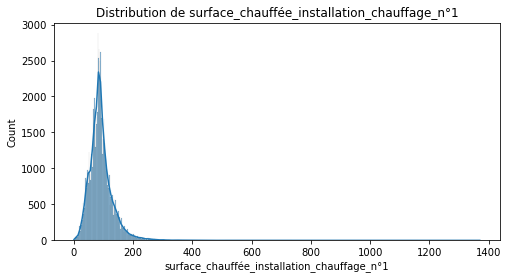

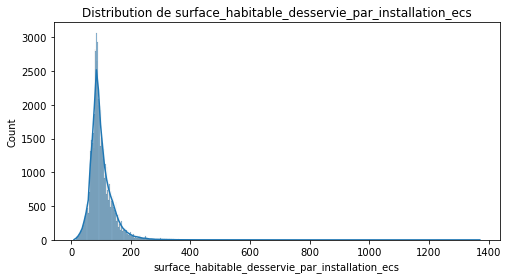

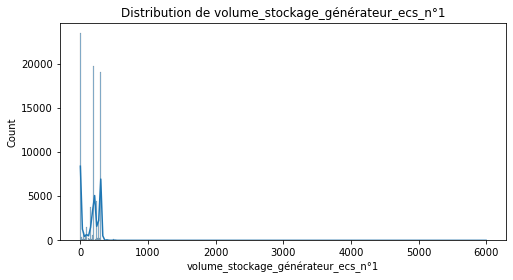

In [131]:
col_num = ['surface_chauffée_installation_chauffage_n°1',
           'surface_habitable_desservie_par_installation_ecs','volume_stockage_générateur_ecs_n°1']
for col in col_num:
    plt.figure(figsize=(8, 4))
    sns.histplot(dpe_filtered[col], kde=True)
    plt.title(f'Distribution de {col}')
    plt.show()

In [132]:
for col in col_num :
    median_value = dpe_filtered[col].median()
    dpe_filtered[col] = dpe_filtered[col].fillna(median_value)

In [133]:
missing_counts = dpe_filtered.isna().sum()
missing_counts = missing_counts[missing_counts > 0]
missing_percent = (missing_counts / len(dpe_filtered)) * 100

missing_info = pd.DataFrame({
    '%_valeurs_manquantes': missing_percent
})

print(missing_info)

                                     %_valeurs_manquantes
logement_traversant_(0/1)                       15.976366
présence_brasseur_air_(0/1)                     15.976366
isolation_toiture_(0/1)                         15.977531
protection_solaire_exterieure_(0/1)             15.976366


In [134]:
col_bool = ['logement_traversant_(0/1)','présence_brasseur_air_(0/1)','isolation_toiture_(0/1)','protection_solaire_exterieure_(0/1)']

for col in col_bool :
    print(f"Valeurs de la variables : {col}")
    print(dpe_unique[col].value_counts(dropna = False))

Valeurs de la variables : logement_traversant_(0/1)
1.0    56197
0.0    17114
NaN    14645
Name: logement_traversant_(0/1), dtype: int64
Valeurs de la variables : présence_brasseur_air_(0/1)
0.0    66477
NaN    14645
1.0     6834
Name: présence_brasseur_air_(0/1), dtype: int64
Valeurs de la variables : isolation_toiture_(0/1)
1.0    69560
NaN    14646
0.0     3750
Name: isolation_toiture_(0/1), dtype: int64
Valeurs de la variables : protection_solaire_exterieure_(0/1)
1.0    47556
0.0    25755
NaN    14645
Name: protection_solaire_exterieure_(0/1), dtype: int64


In [135]:
mode_présence_brasseur_air = dpe_filtered['présence_brasseur_air_(0/1)'].mode()[0]
dpe_filtered['présence_brasseur_air_(0/1)'] = dpe_filtered['présence_brasseur_air_(0/1)'].fillna(mode_présence_brasseur_air)

In [136]:
mode_isolation = dpe_filtered['isolation_toiture_(0/1)'].mode()[0]
dpe_filtered['isolation_toiture_(0/1)'] = dpe_filtered['isolation_toiture_(0/1)'].fillna(mode_isolation)

In [137]:
mode_traversant = dpe_filtered['logement_traversant_(0/1)'].mode()[0]
dpe_filtered['logement_traversant_(0/1)'] = dpe_filtered['logement_traversant_(0/1)'].fillna(mode_traversant)

In [138]:
mode_protec_solaire = dpe_filtered['protection_solaire_exterieure_(0/1)'].mode()[0]
dpe_filtered['protection_solaire_exterieure_(0/1)'] = dpe_filtered['protection_solaire_exterieure_(0/1)'].fillna(mode_protec_solaire)

In [139]:
dpe_filtered.shape

(85808, 53)

In [140]:
dpe_filtered.isna().sum()

etiquette_dpe                                       0
année_construction                                  0
période_construction                                0
hauteur_sous-plafond                                0
nombre_niveau_logement                              0
surface_habitable_logement                          0
classe_inertie_bâtiment                             0
classe_altitude                                     0
zone_climatique_                                    0
score_ban                                           0
n°_région_(ban)                                     0
conso_5_usages/m²_é_finale                          0
type_énergie_n°1                                    0
type_énergie_n°2                                    0
logement_traversant_(0/1)                           0
présence_brasseur_air_(0/1)                         0
indicateur_confort_été                              0
isolation_toiture_(0/1)                             0
protection_solaire_exterieur

# Distribution des variables et corrélations

In [141]:
# Séparer les colonnes numériques et catégoriques
colonnes_numeriques = dpe_filtered.drop(columns=['conso_5_usages/m²_é_finale','etiquette_dpe']).select_dtypes(include=['float64', 'int64']).columns
colonnes_categoriques = dpe_filtered.select_dtypes(include=['object']).columns
target = dpe_filtered['conso_5_usages/m²_é_finale']

# 1. Classification des colonnes numériques entre continues et discrètes
numeriques_continues = [col for col in colonnes_numeriques if dpe_filtered[col].nunique() > 20]
numeriques_discretes = [col for col in colonnes_numeriques if dpe_filtered[col].nunique() <= 20]

# Résultat
print("Colonnes numériques continues :", numeriques_continues)
print("Colonnes numériques discrètes :", numeriques_discretes)
print("Colonnes catégoriques :", colonnes_categoriques)
print(target) 

Colonnes numériques continues : ['année_construction', 'hauteur_sous-plafond', 'surface_habitable_logement', 'score_ban', 'deperditions_baies_vitrées', 'deperditions_enveloppe', 'déperditions_murs', 'deperditions_planchers_bas', 'deperditions_planchers_hauts', 'déperditions_ponts_thermiques', 'déperditions_portes', 'déperditions_renouvellement_air', 'ubat_w/m²_k', 'apports_internes_saison_chauffe_', 'apports_internes_saison_froid', 'apports_solaires_saison_chauffe', 'apports_solaires_saison_froid', 'surface_chauffée_installation_chauffage_n°1', 'surface_habitable_desservie_par_installation_ecs', 'volume_stockage_générateur_ecs_n°1', 'production_électricité_pv_(kwhep/an)']
Colonnes numériques discrètes : ['période_construction', 'nombre_niveau_logement', 'classe_inertie_bâtiment', 'classe_altitude', 'n°_région_(ban)', 'logement_traversant_(0/1)', 'présence_brasseur_air_(0/1)', 'indicateur_confort_été', 'isolation_toiture_(0/1)', 'protection_solaire_exterieure_(0/1)', 'inertie_lourde_(0/

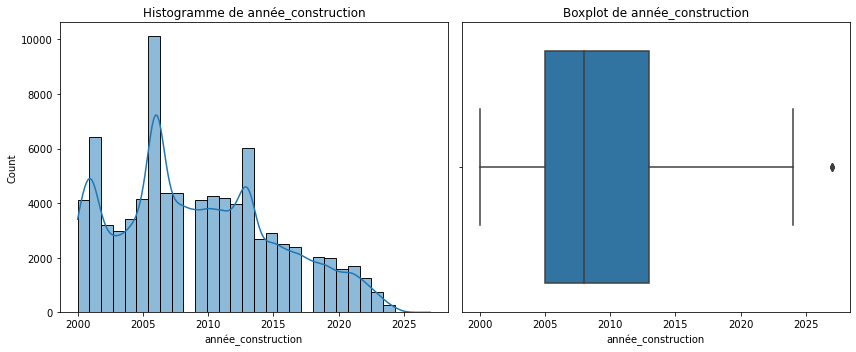

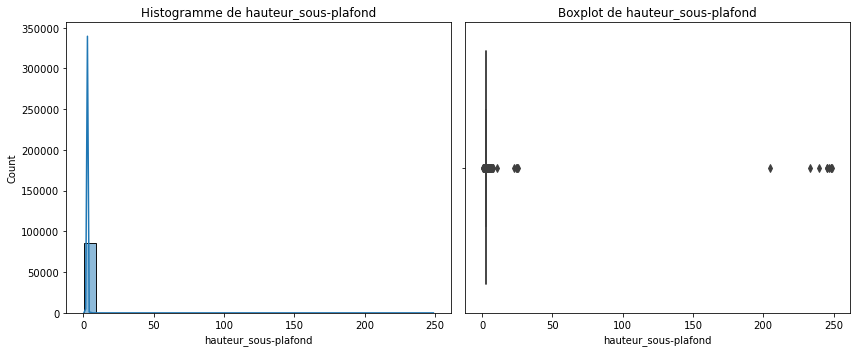

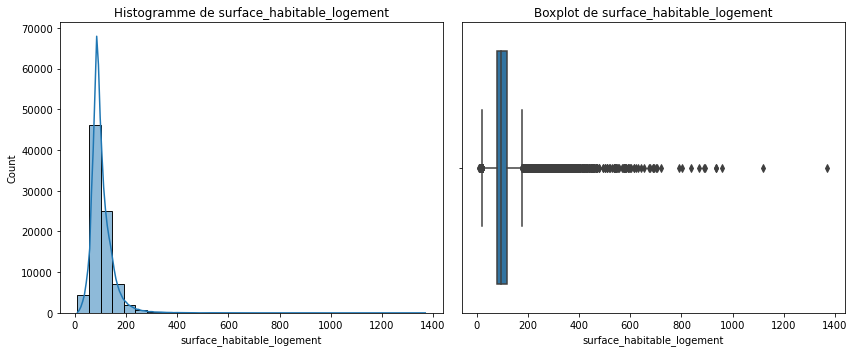

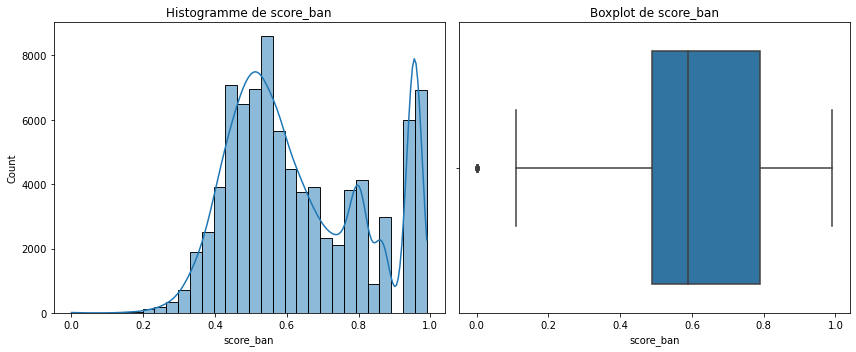

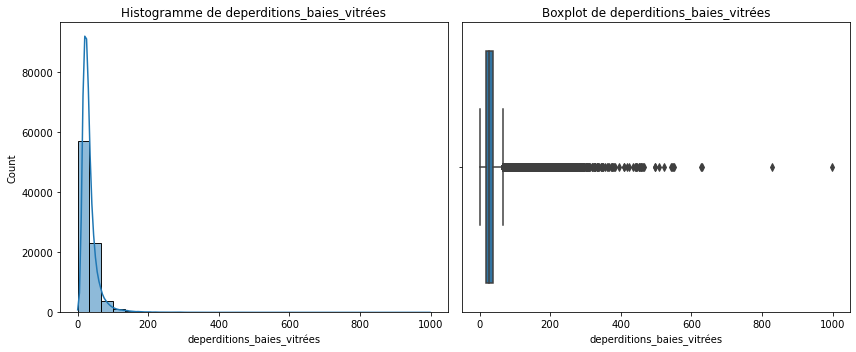

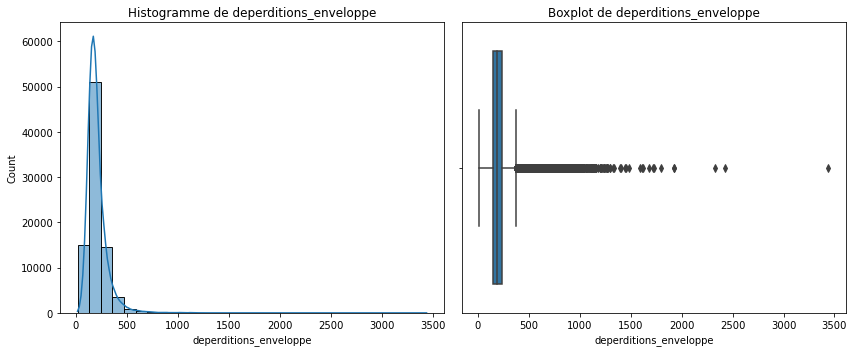

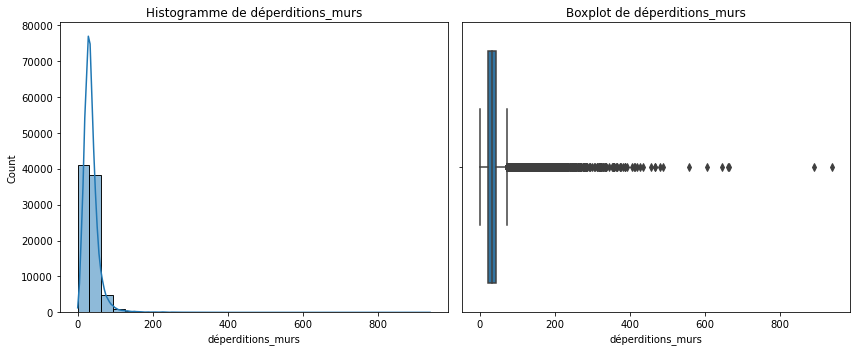

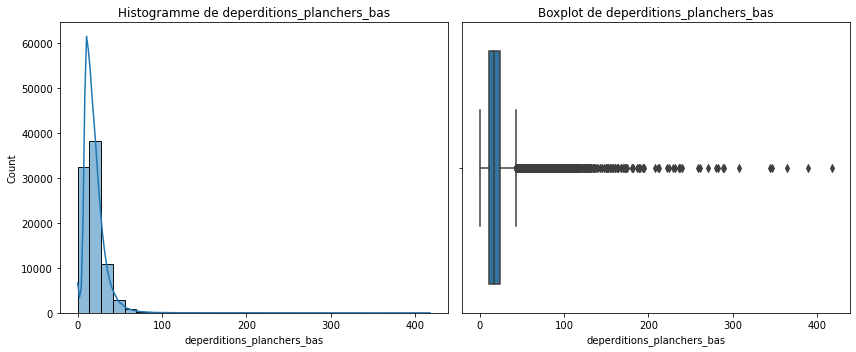

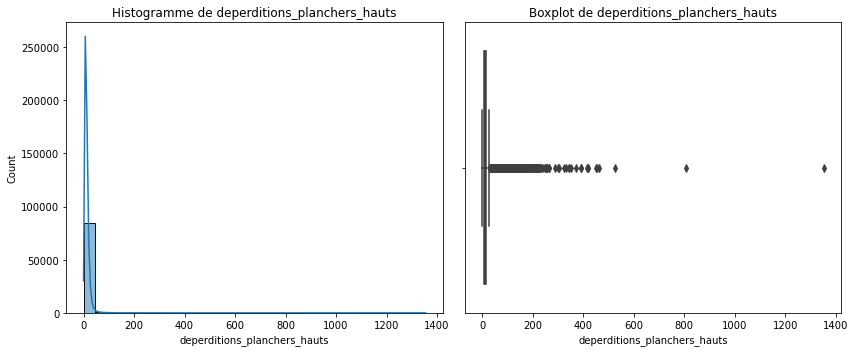

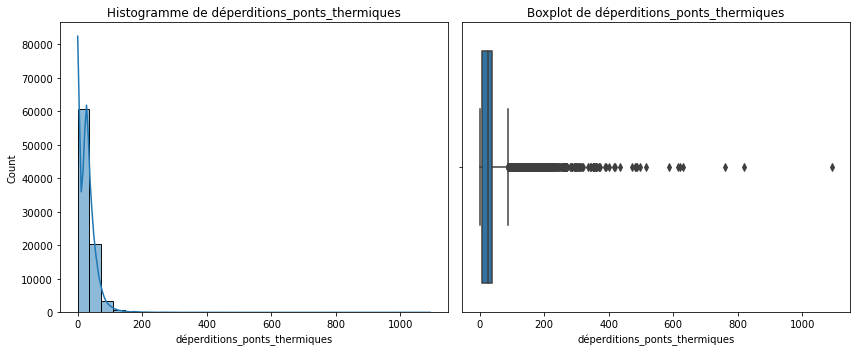

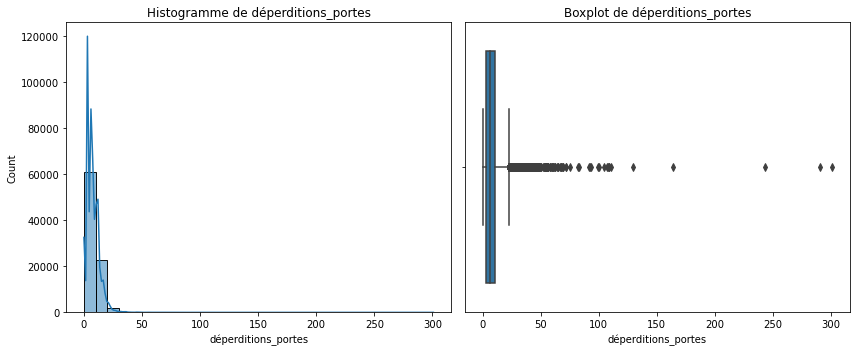

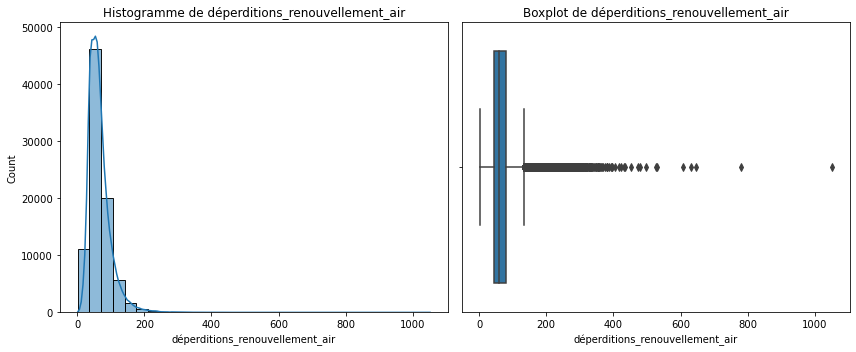

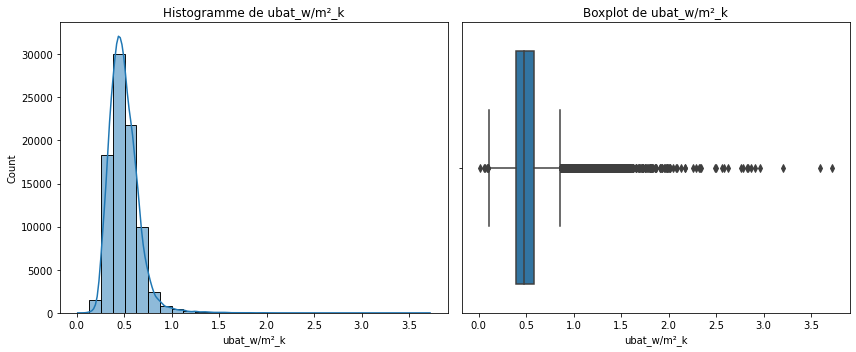

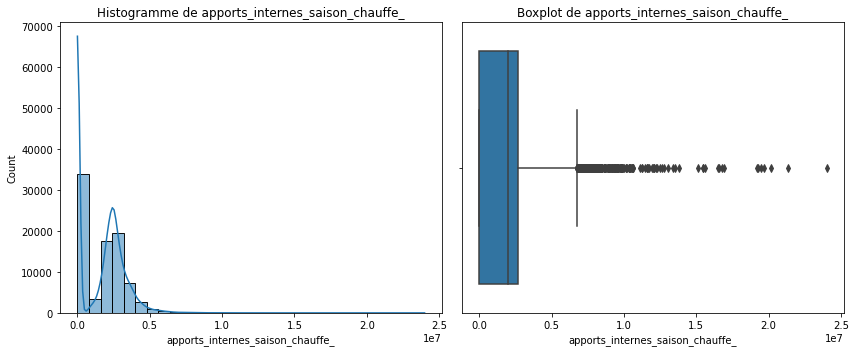

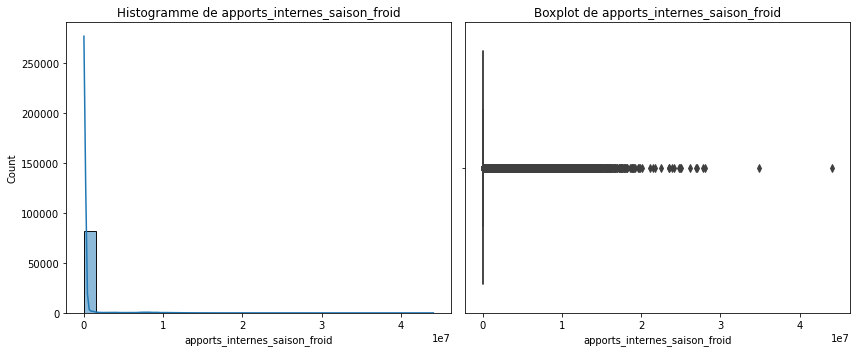

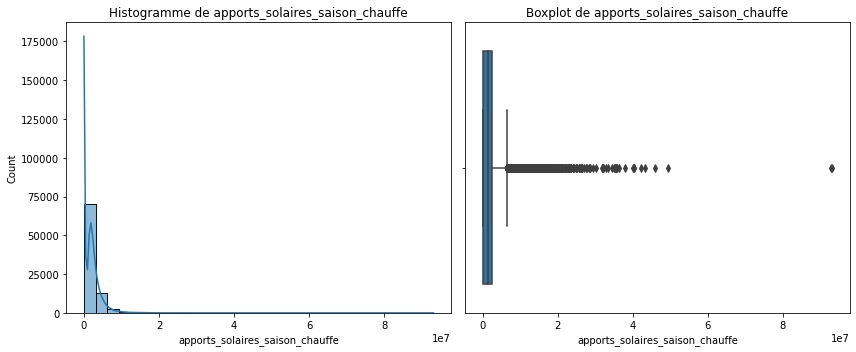

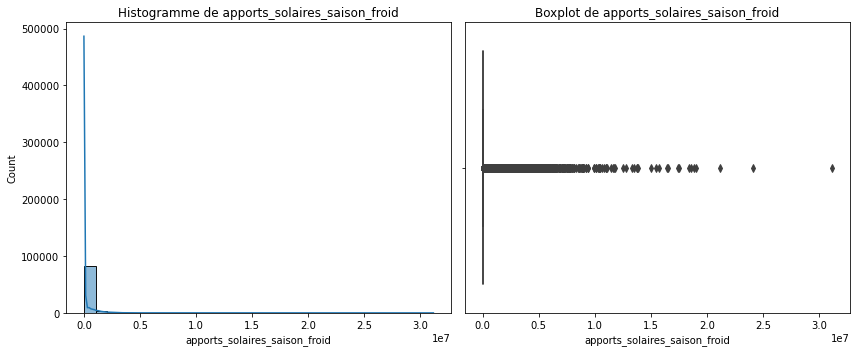

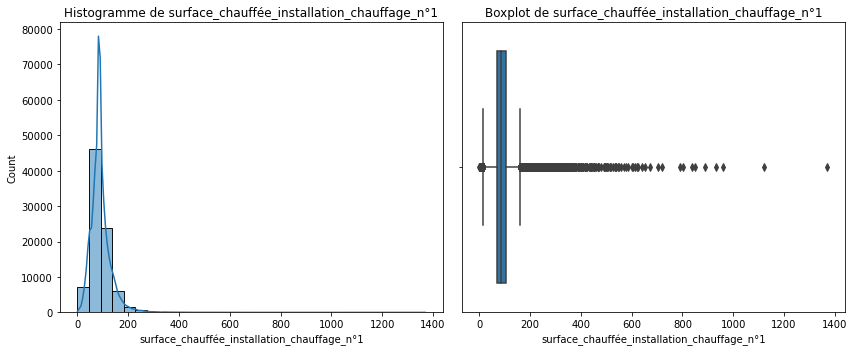

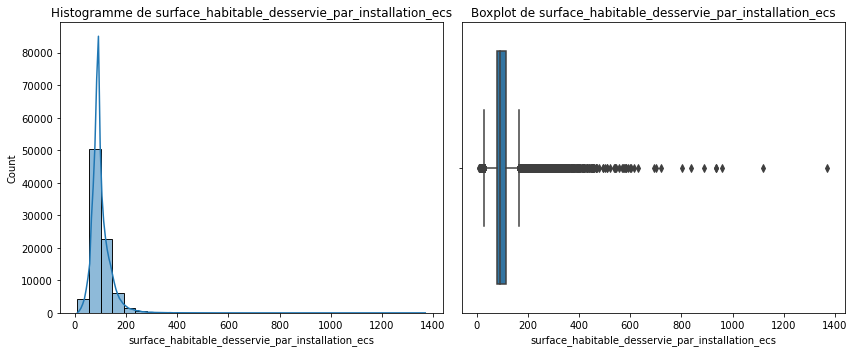

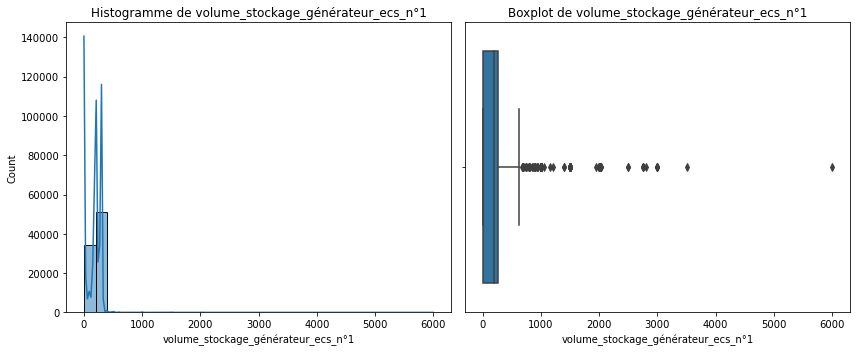

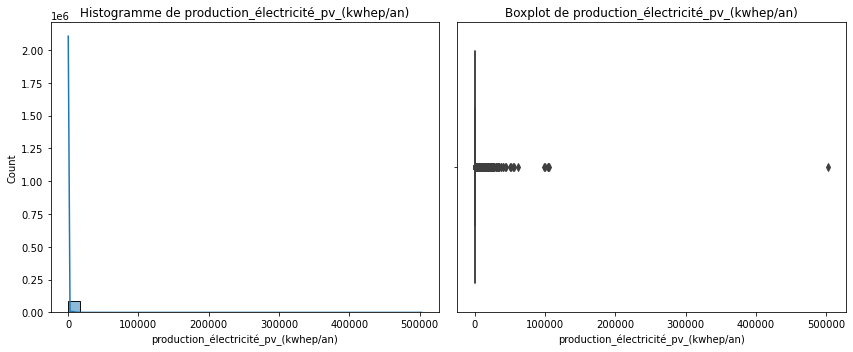

In [142]:
# Visualisation de la distribution des colonnes numériques continues
for col in numeriques_continues:
    plt.figure(figsize=(12, 5))

    # Histogramme
    plt.subplot(1, 2, 1)
    sns.histplot(dpe_filtered[col], kde=True, bins=30)
    plt.title(f'Histogramme de {col}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=dpe_filtered[col])
    plt.title(f'Boxplot de {col}')

    plt.tight_layout()
    plt.show()

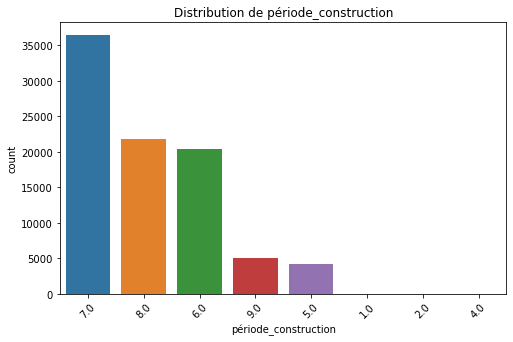

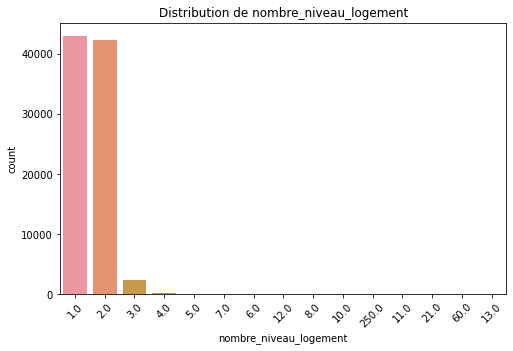

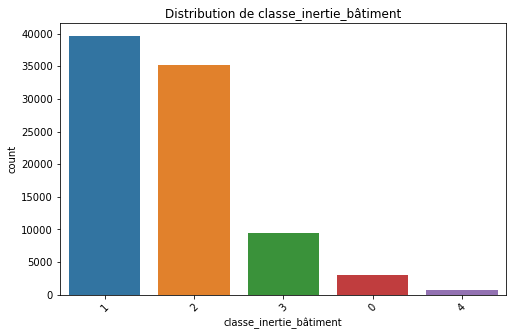

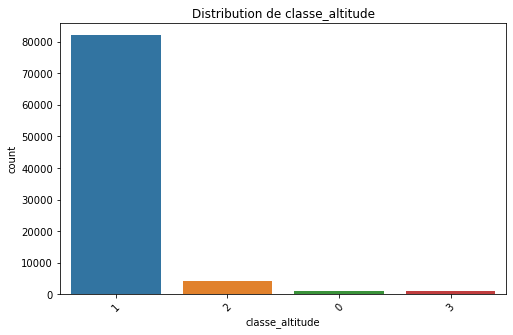

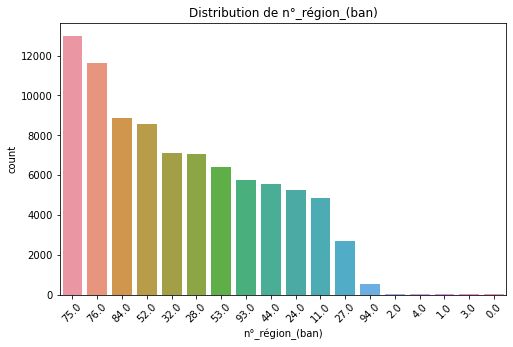

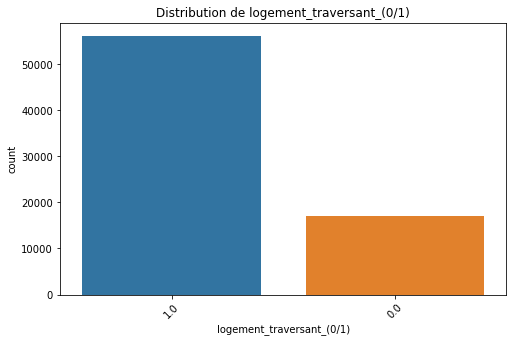

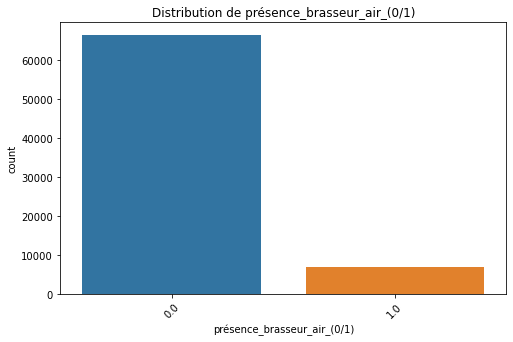

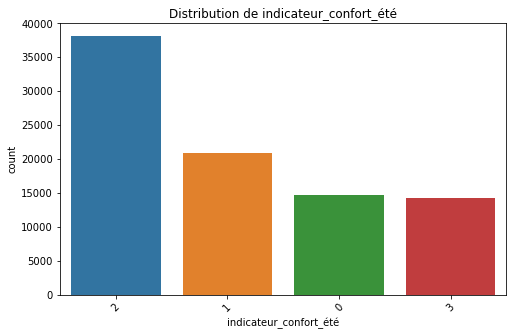

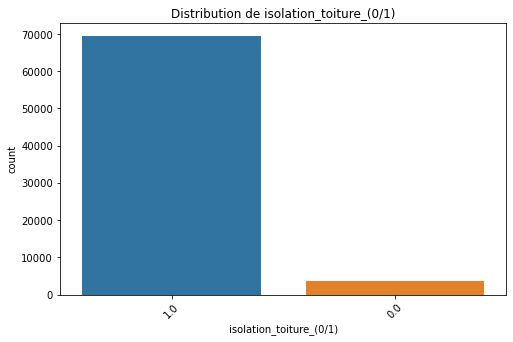

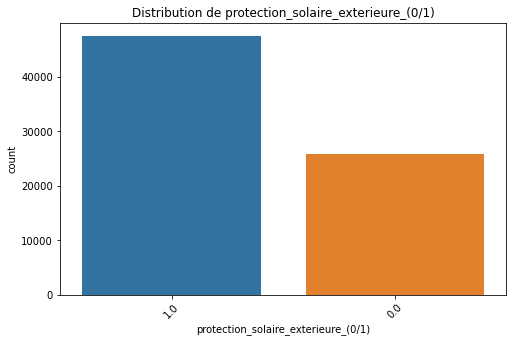

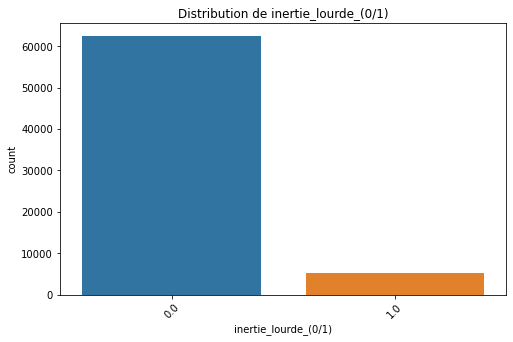

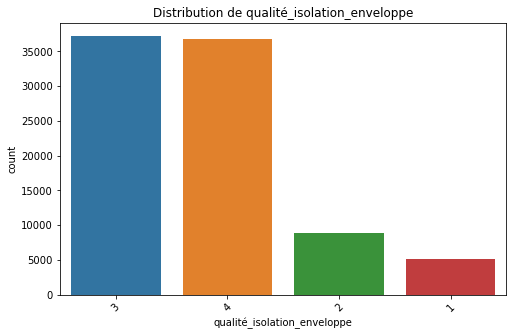

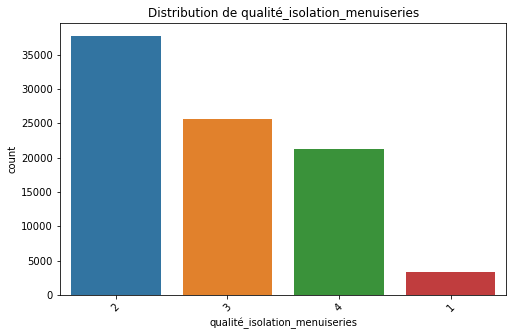

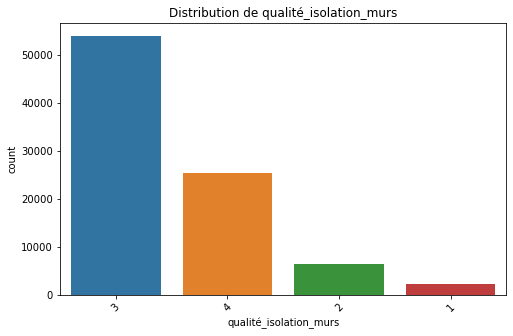

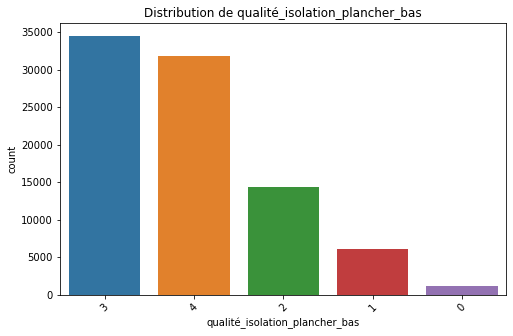

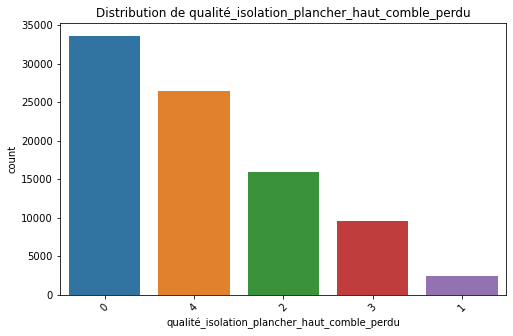

In [143]:
# Visualisation des colonnes numériques discretes :
for col in numeriques_discretes:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=dpe_unique[col], order=dpe_unique[col].value_counts().index)
    plt.title(f'Distribution de {col}')
    plt.xticks(rotation=45) 
    plt.show()

In [144]:
# La variable cible

print(dpe_filtered['conso_5_usages/m²_é_finale'].describe())

count    85808.000000
mean        85.441818
std         40.347600
min          5.200000
25%         55.900000
50%         84.000000
75%        109.000000
max        603.000000
Name: conso_5_usages/m²_é_finale, dtype: float64


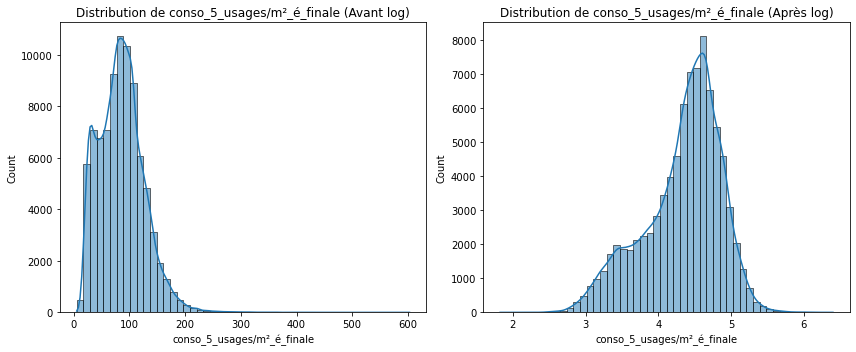

In [145]:
# Visualisation de la variable 
plt.figure(figsize=(12, 5))

# Histogramme de la variable cible avant transformation
plt.subplot(1, 2, 1)
sns.histplot(dpe_filtered['conso_5_usages/m²_é_finale'], bins=50, kde=True)
plt.title("Distribution de conso_5_usages/m²_é_finale (Avant log)")

# Histogramme après transformation log
plt.subplot(1, 2, 2)
sns.histplot(np.log1p(dpe_filtered['conso_5_usages/m²_é_finale']), bins=50, kde=True)  # log1p pour éviter log(0)
plt.title("Distribution de conso_5_usages/m²_é_finale (Après log)")

plt.tight_layout()
plt.show()

In [146]:
dpe_filtered.describe().T.head(50)

,count,mean,std,min,25%,50%,75%,max
etiquette_dpe,85808.0,3.113463e+00,1.005824e+00,1.00,3.000,3.00,4.000,7.00
année_construction,85808.0,2.009195e+03,6.000097e+00,2000.00,2005.000,2008.00,2013.000,2027.00
période_construction,85808.0,7.037665e+00,9.548056e-01,1.00,6.000,7.00,8.000,9.00
hauteur_sous-plafond,85808.0,2.541780e+00,2.446249e+00,0.40,2.500,2.50,2.500,249.00
nombre_niveau_logement,85808.0,1.550753e+00,1.043692e+00,1.00,1.000,2.00,2.000,250.00
surface_habitable_logement,85808.0,1.035677e+02,4.396560e+01,9.80,79.600,93.50,119.100,1370.00
classe_inertie_bâtiment,85808.0,1.615514e+00,7.343492e-01,0.00,1.000,2.00,2.000,4.00
classe_altitude,85808.0,1.069236e+00,2.947296e-01,1.00,1.000,1.00,1.000,3.00
score_ban,85808.0,6.334597e-01,1.896087e-01,0.00,0.490,0.59,0.790,0.99
n°_région_(ban),85808.0,5.611377e+01,2.467577e+01,0.00,32.000,53.00,76.000,94.00


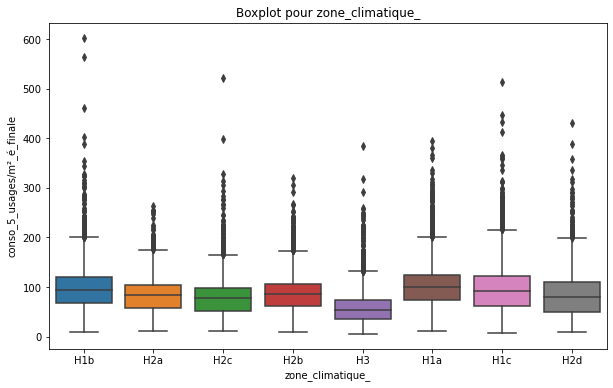

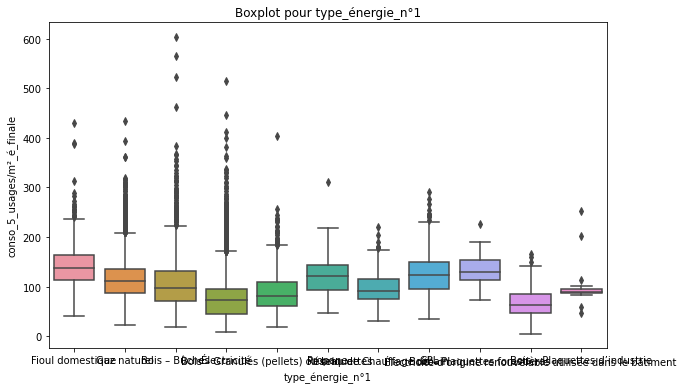

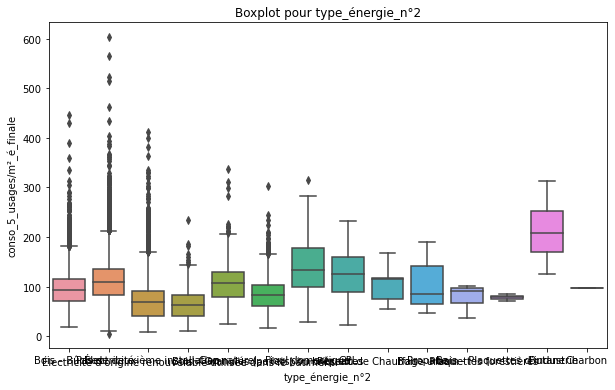

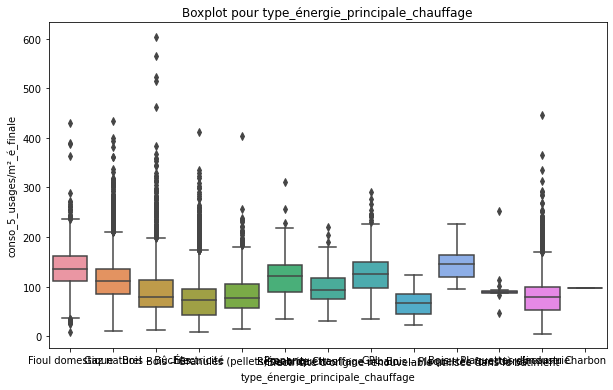

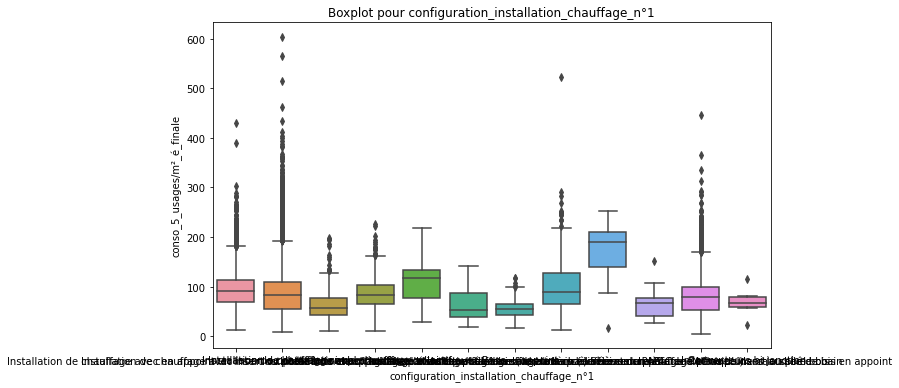

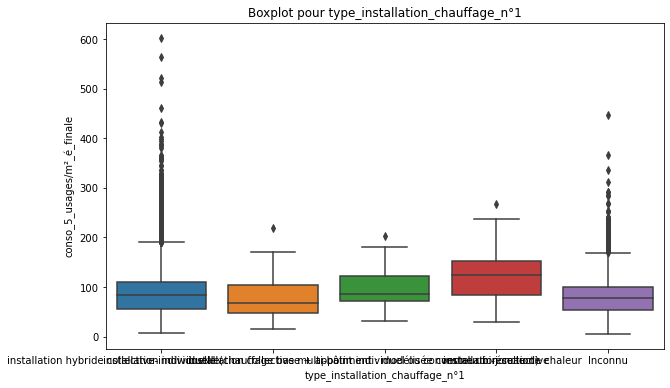

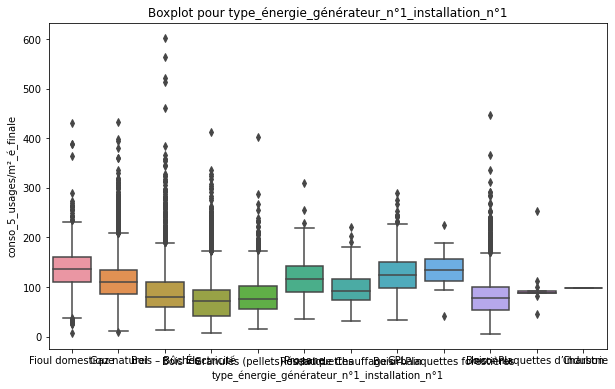

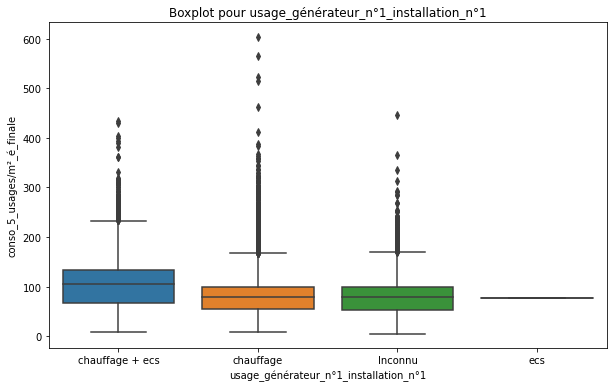

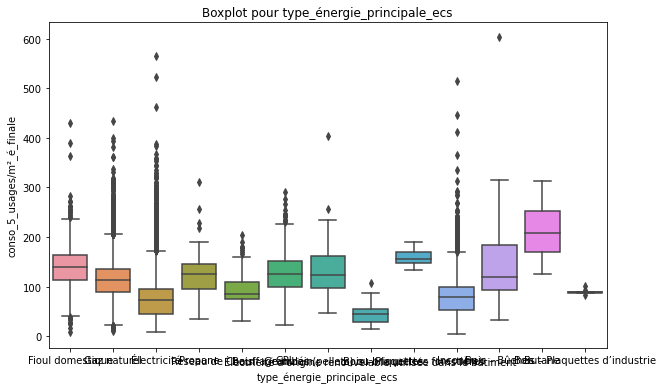

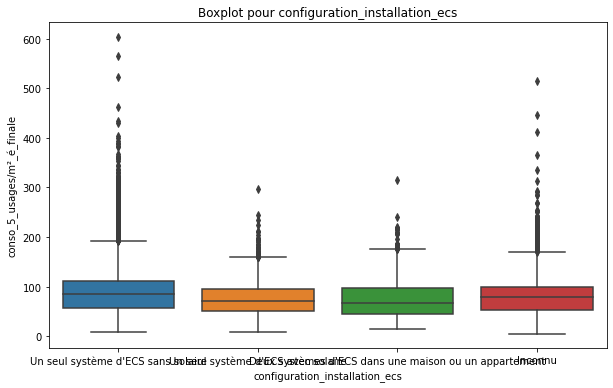

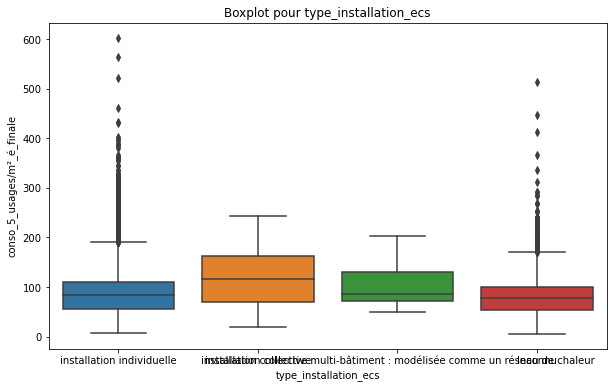

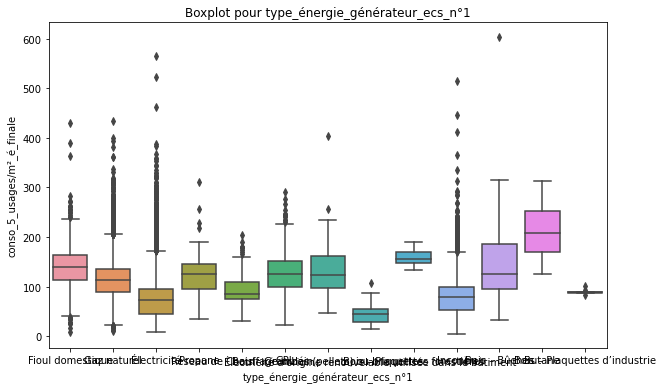

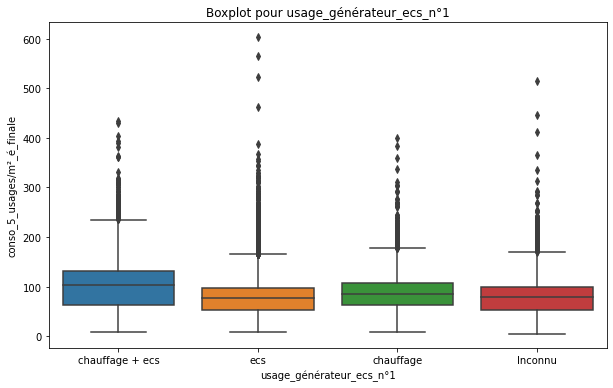

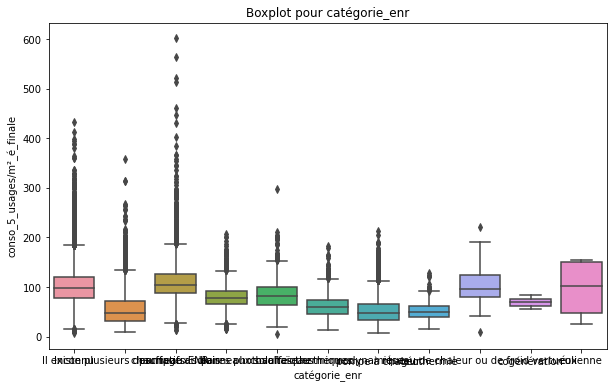

In [147]:
# Relation entre la variable cible et les variables catégoriques :
for col in colonnes_categoriques:
    plt.figure(figsize=(10, 6))  # Facultatif : définir la taille du graphique
    sns.boxplot(x=dpe_filtered[col], y=dpe_filtered['conso_5_usages/m²_é_finale'])
    plt.title(f"Boxplot pour {col}")
    plt.show()

In [148]:
for col in colonnes_categoriques :
    print((f"Unique val pour {col}"))
    print(dpe_filtered[col].nunique())

Unique val pour zone_climatique_
8
Unique val pour type_énergie_n°1
11
Unique val pour type_énergie_n°2
14
Unique val pour type_énergie_principale_chauffage
13
Unique val pour configuration_installation_chauffage_n°1
12
Unique val pour type_installation_chauffage_n°1
5
Unique val pour type_énergie_générateur_n°1_installation_n°1
12
Unique val pour usage_générateur_n°1_installation_n°1
4
Unique val pour type_énergie_principale_ecs
13
Unique val pour configuration_installation_ecs
4
Unique val pour type_installation_ecs
4
Unique val pour type_énergie_générateur_ecs_n°1
13
Unique val pour usage_générateur_ecs_n°1
4
Unique val pour catégorie_enr
11


Toutes les variables catégoriques semblent corrélées sauf : configuration installation ecs.

In [149]:
dpe_filtered = dpe_filtered.drop(['configuration_installation_ecs'], axis=1) 


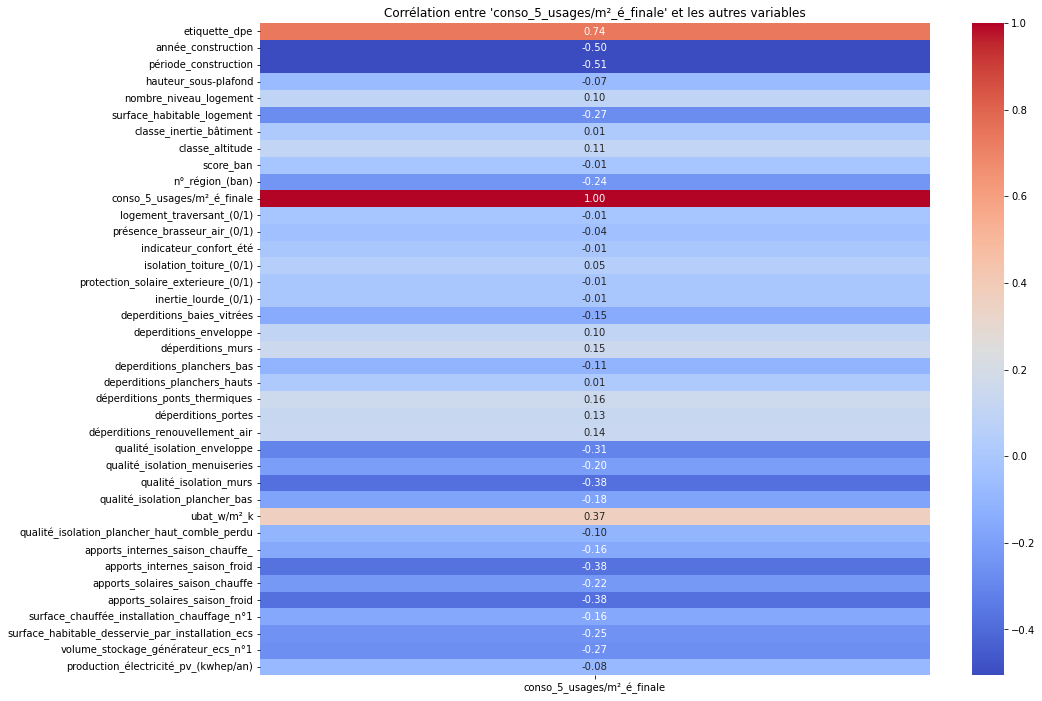

In [150]:
corr = dpe_filtered.corr(method="spearman")

# Extraire la corrélation avec 'année_construction' et 'numero_etage_appartement'
correlation_target = corr[['conso_5_usages/m²_é_finale']]

# Heatmap de corrélation pour "année_construction" et "numero_etage_appartement"
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_target, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Corrélation entre 'conso_5_usages/m²_é_finale' et les autres variables")
plt.show()

Nous allons garder les variables suivantes : 
- période_construction
- surface_habitable_logement
- n_region
- déperditions_murs
- déperditions_ponts_thermiques
- deperditions_baies_vitrées
- qualité_isolation_enveloppe
- qualité_isolation_murs
- ubat_w/m2_k
- apport_internes_saison_froid
- apport_solaires_saison_froid
- volume_stockage_générateur

In [151]:
dpe_filtered.columns

Index(['etiquette_dpe', 'année_construction', 'période_construction',
       'hauteur_sous-plafond', 'nombre_niveau_logement',
       'surface_habitable_logement', 'classe_inertie_bâtiment',
       'classe_altitude', 'zone_climatique_', 'score_ban', 'n°_région_(ban)',
       'conso_5_usages/m²_é_finale', 'type_énergie_n°1', 'type_énergie_n°2',
       'logement_traversant_(0/1)', 'présence_brasseur_air_(0/1)',
       'indicateur_confort_été', 'isolation_toiture_(0/1)',
       'protection_solaire_exterieure_(0/1)', 'inertie_lourde_(0/1)',
       'deperditions_baies_vitrées', 'deperditions_enveloppe',
       'déperditions_murs', 'deperditions_planchers_bas',
       'deperditions_planchers_hauts', 'déperditions_ponts_thermiques',
       'déperditions_portes', 'déperditions_renouvellement_air',
       'qualité_isolation_enveloppe', 'qualité_isolation_menuiseries',
       'qualité_isolation_murs', 'qualité_isolation_plancher_bas',
       'ubat_w/m²_k', 'qualité_isolation_plancher_haut_comble

In [152]:
# Les colonnes qu'on garde :
dpe_final = dpe_filtered[['etiquette_dpe', 'période_construction',
       'surface_habitable_logement', 'zone_climatique_', 'n°_région_(ban)',
       'conso_5_usages/m²_é_finale', 'type_énergie_n°1', 
       'deperditions_baies_vitrées','déperditions_murs', 'déperditions_ponts_thermiques',
       'qualité_isolation_enveloppe', 'qualité_isolation_murs', 'ubat_w/m²_k',
       'apports_internes_saison_froid', 'apports_solaires_saison_froid',
       'type_énergie_principale_chauffage',
       'configuration_installation_chauffage_n°1',
       'type_installation_chauffage_n°1',
       'type_énergie_générateur_n°1_installation_n°1',
       'usage_générateur_n°1_installation_n°1', 'type_énergie_principale_ecs',
       'type_installation_ecs',
       'type_énergie_générateur_ecs_n°1', 'usage_générateur_ecs_n°1',
       'volume_stockage_générateur_ecs_n°1', 'catégorie_enr']]


<AxesSubplot:>

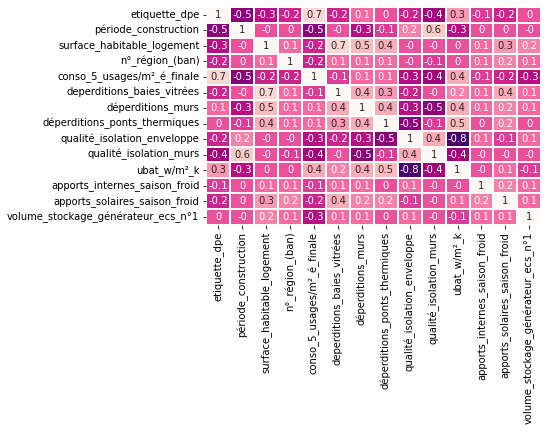

In [153]:
# Dernière vérification de la multicolinéarité :
corr_mat = dpe_final.corr().round(1)
sns.heatmap(corr_mat,
                cmap='RdPu_r',square=False,lw=2,annot=True,cbar=False)

In [155]:
# periode construction et quali isolations murs --> on suppr quali isolation murs
# deperditon murs et qualité isolation murs et ubat --> on suppr isolation et ubat
# apport solaire froid /chaud --> on suppr le chaud
# deperdition baies vitrees et surface habitable --> on suppr les deperditions

dpe_final = dpe_final.drop(columns = ['qualité_isolation_murs','ubat_w/m²_k',
                                           'deperditions_baies_vitrées','déperditions_murs',
                                     'déperditions_ponts_thermiques'], axis=1) 

<AxesSubplot:>

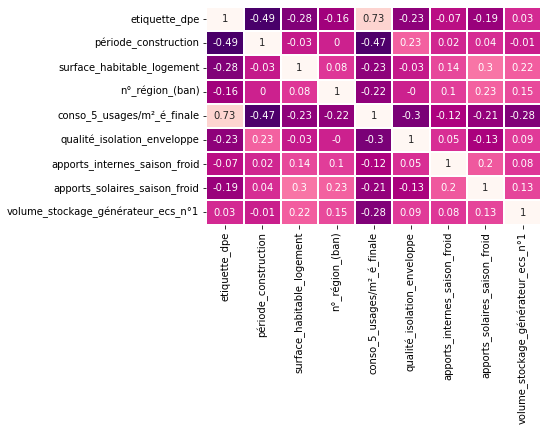

In [156]:
corr_mat = dpe_final.corr().round(2)
sns.heatmap(corr_mat,
                cmap='RdPu_r',square=False,lw=2,annot=True,cbar=False)

In [157]:
dpe_final.shape

(85808, 21)

In [158]:
dpe_final.isnull().sum()

etiquette_dpe                                   0
période_construction                            0
surface_habitable_logement                      0
zone_climatique_                                0
n°_région_(ban)                                 0
conso_5_usages/m²_é_finale                      0
type_énergie_n°1                                0
qualité_isolation_enveloppe                     0
apports_internes_saison_froid                   0
apports_solaires_saison_froid                   0
type_énergie_principale_chauffage               0
configuration_installation_chauffage_n°1        0
type_installation_chauffage_n°1                 0
type_énergie_générateur_n°1_installation_n°1    0
usage_générateur_n°1_installation_n°1           0
type_énergie_principale_ecs                     0
type_installation_ecs                           0
type_énergie_générateur_ecs_n°1                 0
usage_générateur_ecs_n°1                        0
volume_stockage_générateur_ecs_n°1              0


# Train-Test split

In [159]:
X = dpe_final.drop(columns=['conso_5_usages/m²_é_finale','etiquette_dpe'])
y = dpe_final['conso_5_usages/m²_é_finale']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [160]:
# Séparation de X train entre catégorique et numérique
col_X_train_num = X_train.select_dtypes(include=['float64', 'int64']).columns
col_X_train_cat = X_train.select_dtypes(include=['object']).columns

col_X_test_num = X_test.select_dtypes(include=['float64', 'int64']).columns
col_X_test_cat = X_test.select_dtypes(include=['object']).columns

X_train_numeriques_continues = [col for col in col_X_train_num if X_train[col].nunique() > 20]
X_train_numeriques_discretes = [col for col in col_X_train_num if X_train[col].nunique() <= 20]

X_test_numeriques_continues = [col for col in col_X_test_num if X_test[col].nunique() > 20]
X_test_numeriques_discretes = [col for col in col_X_test_num if X_test[col].nunique() <= 20]

# Créer des DataFrames distincts pour les colonnes numériques et catégoriques
X_train_num_cont = X_train[X_train_numeriques_continues]
X_train_num_disc = X_train[X_train_numeriques_discretes]
X_train_cat = X_train[col_X_train_cat]

X_test_num_cont = X_test[X_test_numeriques_continues]
X_test_num_disc = X_test[X_test_numeriques_discretes]
X_test_cat = X_test[col_X_test_cat]


In [161]:
print(X_train_num_cont.shape)
print(X_train_num_disc.shape)
print(X_train_cat.shape)
print(y_train.shape)

(68646, 4)
(68646, 3)
(68646, 12)
(68646,)


# Suppression des outliers

In [162]:
# Étape 1 : Détection des outliers dans X_train_num_continu
Q1 = X_train_num_cont.quantile(0.25)  # Premier quartile
Q3 = X_train_num_cont.quantile(0.75)  # Troisième quartile
IQR = Q3 - Q1  # Intervalle interquartile

# Calcul des bornes pour détecter les outliers
borne_inferieure = Q1 - 1.5 * IQR
borne_superieure = Q3 + 1.5 * IQR

# Création d'un masque pour conserver les lignes sans outliers
mask = ~((X_train_num_cont < borne_inferieure) | (X_train_num_cont > borne_superieure)).any(axis=1)

# Étape 2 : Appliquer le masque sur X_train_num_continu
X_train_num_cont_noout = X_train_num_cont[mask]

# Étape 3 : Appliquer le même masque sur le reste des jeux de données
X_train_num_disc_noout = X_train_num_disc[mask]
X_train_cat_noout = X_train_cat[mask]
y_train_noout = y_train[mask]

# Vérification des tailles après suppression
print(f"Taille avant suppression : {X_train_num_disc.shape[0]}")
print(f"Taille après suppression : {X_train_num_disc_noout.shape[0]}")

print(f"Taille avant suppression : {y_train.shape[0]}")
print(f"Taille après suppression : {y_train_noout.shape[0]}")

Taille avant suppression : 68646
Taille après suppression : 53249
Taille avant suppression : 68646
Taille après suppression : 53249


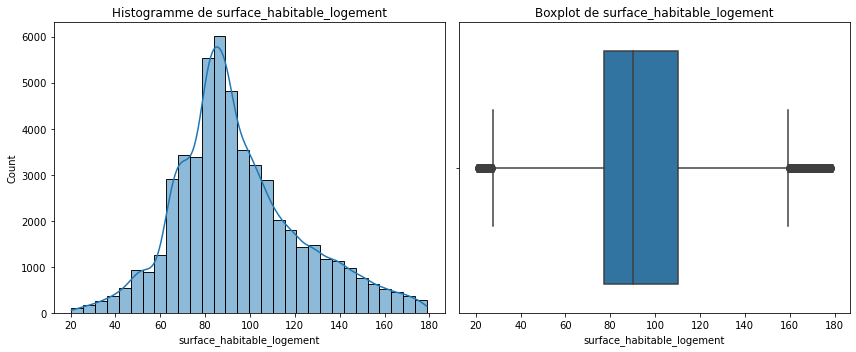

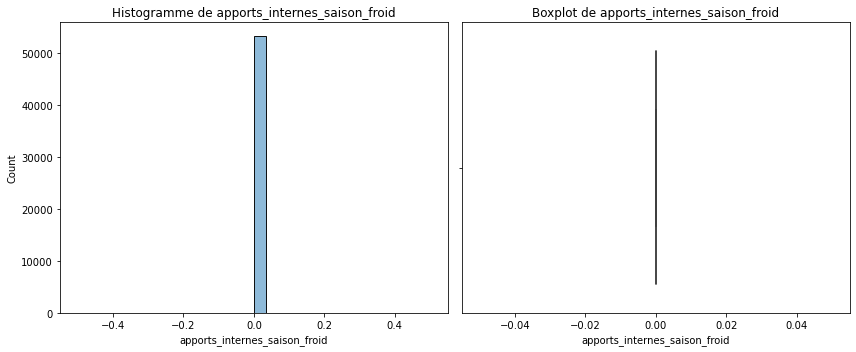

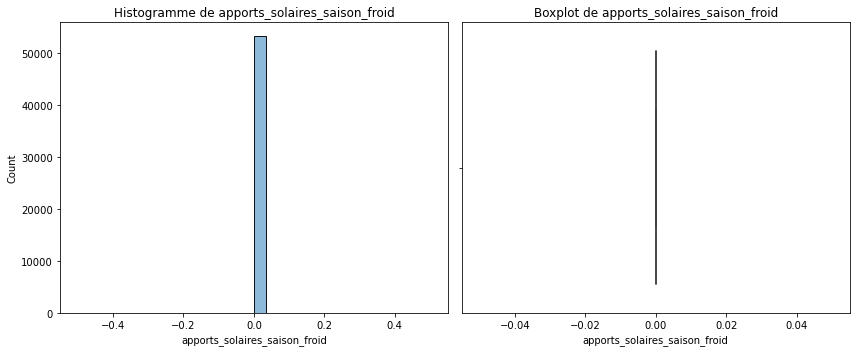

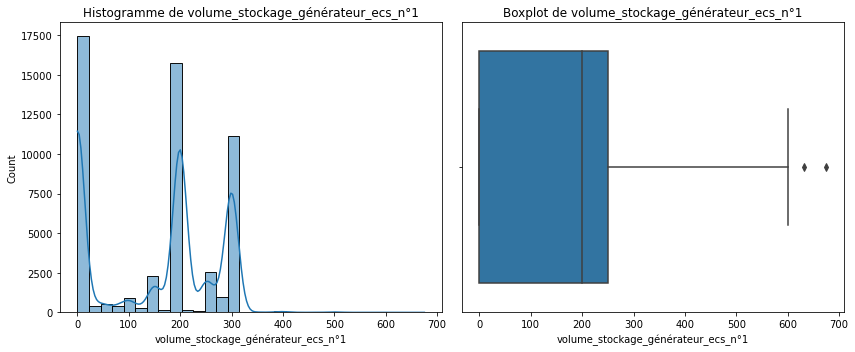

In [163]:
for col in X_train_num_cont_noout.columns:
    plt.figure(figsize=(12, 5))

    # Histogramme
    plt.subplot(1, 2, 1)
    sns.histplot(X_train_num_cont_noout[col], kde=True, bins=30)
    plt.title(f'Histogramme de {col}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=X_train_num_cont_noout[col])
    plt.title(f'Boxplot de {col}')

    plt.tight_layout()
    plt.show()

# Data Pre Processing

In [164]:
# Encodage des variables catégoriques

for col in X_train_cat_noout.columns :
    label_encoder = preprocessing.LabelEncoder()
    X_train_cat_noout[col]= label_encoder.fit_transform(X_train_cat_noout[col])
    X_train_cat_noout[col].unique()

/var/folders/tk/75w8q4_s16n1_zv4jdmdlwhh0000gp/T/ipykernel_69491/354078510.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_cat_noout[col]= label_encoder.fit_transform(X_train_cat_noout[col])


In [165]:
X_train_cat_noout.head()

,zone_climatique_,type_énergie_n°1,type_énergie_principale_chauffage,configuration_installation_chauffage_n°1,type_installation_chauffage_n°1,type_énergie_générateur_n°1_installation_n°1,usage_générateur_n°1_installation_n°1,type_énergie_principale_ecs,type_installation_ecs,type_énergie_générateur_ecs_n°1,usage_générateur_ecs_n°1,catégorie_enr
62972,5,9,11,7,4,11,1,10,3,10,3,2
30761,2,6,7,11,4,7,2,6,3,6,2,6
42804,4,9,11,11,4,11,2,10,3,10,2,7
35157,3,9,11,11,4,11,1,10,3,10,3,1
7944,2,6,7,7,4,7,2,6,3,6,2,0


In [166]:
y_train_noout.head()

62972     91.0
30761     60.8
42804     22.0
35157     85.0
7944     179.9
Name: conso_5_usages/m²_é_finale, dtype: float64

In [167]:
# Idem sur le test set

for col in X_test_cat.columns :
    label_encoder = preprocessing.LabelEncoder()
    X_test_cat[col]= label_encoder.fit_transform(X_test_cat[col])
    X_test_cat[col].unique()

/var/folders/tk/75w8q4_s16n1_zv4jdmdlwhh0000gp/T/ipykernel_69491/2425909870.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_cat[col]= label_encoder.fit_transform(X_test_cat[col])


In [168]:
# Assurez-vous que y_train est un DataFrame ou une Series avec un nom de colonne clair
y_train_pd = pd.DataFrame(y_train_noout, columns=['conso_5_usages/m²_é_finale'])

# Concaténer X_train avec y_train
matrix = pd.concat([X_train_cat_noout, y_train_pd], axis=1)

matrix.head()

,zone_climatique_,type_énergie_n°1,type_énergie_principale_chauffage,configuration_installation_chauffage_n°1,type_installation_chauffage_n°1,type_énergie_générateur_n°1_installation_n°1,usage_générateur_n°1_installation_n°1,type_énergie_principale_ecs,type_installation_ecs,type_énergie_générateur_ecs_n°1,usage_générateur_ecs_n°1,catégorie_enr,conso_5_usages/m²_é_finale
62972,5,9,11,7,4,11,1,10,3,10,3,2,91.0
30761,2,6,7,11,4,7,2,6,3,6,2,6,60.8
42804,4,9,11,11,4,11,2,10,3,10,2,7,22.0
35157,3,9,11,11,4,11,1,10,3,10,3,1,85.0
7944,2,6,7,7,4,7,2,6,3,6,2,0,179.9


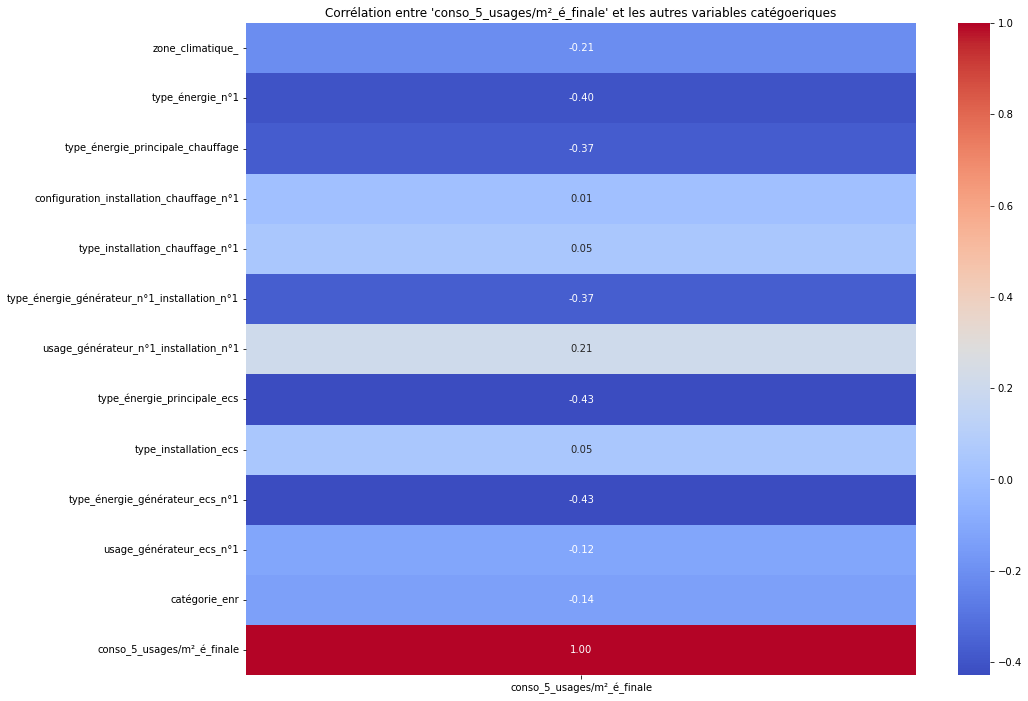

In [169]:
# Checking colinearity in the encoded variable :

correlation_cat = matrix.corr(method="spearman")

# Extraire la corrélation avec 'année_construction' et 'numero_etage_appartement'
correlation_target = correlation_cat[['conso_5_usages/m²_é_finale']]

# Heatmap de corrélation pour "année_construction" et "numero_etage_appartement"
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_target, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Corrélation entre 'conso_5_usages/m²_é_finale' et les autres variables catégoeriques")
plt.show()

In [170]:
matrix.columns

Index(['zone_climatique_', 'type_énergie_n°1',
       'type_énergie_principale_chauffage',
       'configuration_installation_chauffage_n°1',
       'type_installation_chauffage_n°1',
       'type_énergie_générateur_n°1_installation_n°1',
       'usage_générateur_n°1_installation_n°1', 'type_énergie_principale_ecs',
       'type_installation_ecs', 'type_énergie_générateur_ecs_n°1',
       'usage_générateur_ecs_n°1', 'catégorie_enr',
       'conso_5_usages/m²_é_finale'],
      dtype='object')

In [171]:
# Categorical variable selection

cols_to_drop = ['configuration_installation_chauffage_n°1','type_installation_chauffage_n°1',
               'usage_générateur_n°1_installation_n°1','type_installation_ecs',
               'usage_générateur_ecs_n°1', 'catégorie_enr']

X_train_cat_noout = X_train_cat_noout.drop(columns=cols_to_drop)
X_test_cat = X_test_cat.drop(columns=cols_to_drop)

print(X_train_cat_noout.columns)
print(X_test_cat.columns)

Index(['zone_climatique_', 'type_énergie_n°1',
       'type_énergie_principale_chauffage',
       'type_énergie_générateur_n°1_installation_n°1',
       'type_énergie_principale_ecs', 'type_énergie_générateur_ecs_n°1'],
      dtype='object')
Index(['zone_climatique_', 'type_énergie_n°1',
       'type_énergie_principale_chauffage',
       'type_énergie_générateur_n°1_installation_n°1',
       'type_énergie_principale_ecs', 'type_énergie_générateur_ecs_n°1'],
      dtype='object')


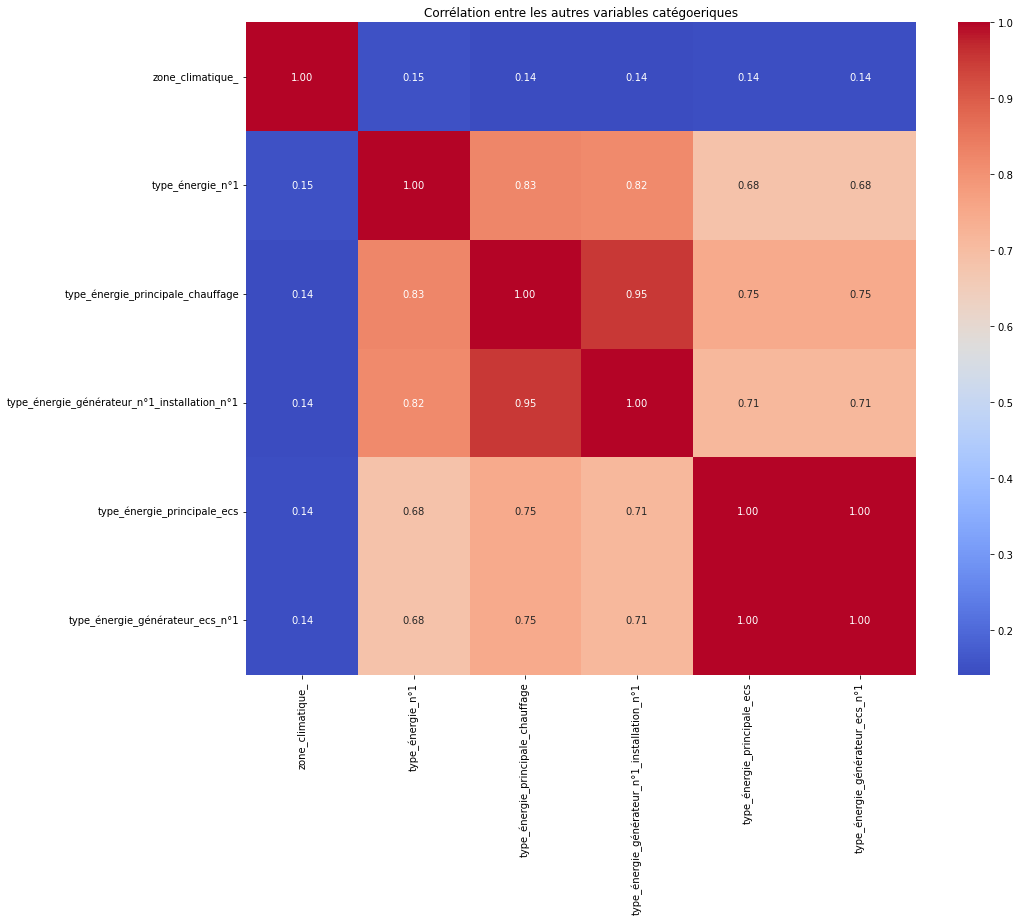

In [172]:
# Checking for multicolinearity in categorical variables

correlation_cat = X_train_cat_noout.corr(method="spearman")

# Heatmap de corrélation pour "année_construction" et "numero_etage_appartement"
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_cat, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Corrélation entre les autres variables catégoeriques")
plt.show()

In [173]:
cols_to_drop = ['type_énergie_générateur_n°1_installation_n°1','type_énergie_générateur_ecs_n°1',
               'type_énergie_principale_chauffage', 'type_énergie_principale_ecs']

X_train_cat_noout = X_train_cat_noout.drop(columns=cols_to_drop)
X_test_cat = X_test_cat.drop(columns=cols_to_drop)

print(X_train_cat_noout.columns)
print(X_test_cat.columns)

Index(['zone_climatique_', 'type_énergie_n°1'], dtype='object')
Index(['zone_climatique_', 'type_énergie_n°1'], dtype='object')


# Regression linéaire

In [174]:
# Concaténer les variables numériques et catégoriques (train et test)
X_train_final = pd.concat([X_train_cat_noout, X_train_num_disc_noout,X_train_num_cont_noout], axis=1)
X_test_final = pd.concat([X_test_cat, X_test_num_disc, X_test_num_cont], axis=1)


In [175]:
X_train_final.head()

,zone_climatique_,type_énergie_n°1,période_construction,n°_région_(ban),qualité_isolation_enveloppe,surface_habitable_logement,apports_internes_saison_froid,apports_solaires_saison_froid,volume_stockage_générateur_ecs_n°1
62972,5,9,7.0,75.0,3,105.0,0.0,0.0,300.0
30761,2,6,8.0,84.0,4,67.3,0.0,0.0,200.0
42804,4,9,8.0,52.0,4,139.9,0.0,0.0,130.0
35157,3,9,7.0,53.0,3,144.0,0.0,0.0,300.0
7944,2,6,5.0,84.0,4,88.5,0.0,0.0,60.0


In [176]:
X_train_final.isnull().sum()

zone_climatique_                      0
type_énergie_n°1                      0
période_construction                  0
n°_région_(ban)                       0
qualité_isolation_enveloppe           0
surface_habitable_logement            0
apports_internes_saison_froid         0
apports_solaires_saison_froid         0
volume_stockage_générateur_ecs_n°1    0
dtype: int64

In [177]:
X_test_final.head()

,zone_climatique_,type_énergie_n°1,période_construction,n°_région_(ban),qualité_isolation_enveloppe,surface_habitable_logement,apports_internes_saison_froid,apports_solaires_saison_froid,volume_stockage_générateur_ecs_n°1
67241,3,9,7.0,53.0,3,102.5,0.0,0.0,250.0
82196,5,9,7.0,75.0,4,35.1,0.0,0.0,200.0
82366,0,9,7.0,53.0,3,174.0,0.0,0.0,300.0
54112,7,9,8.0,76.0,3,85.4,224.8,1001.9,262.0
66195,1,6,7.0,44.0,1,90.9,0.0,0.0,0.0


In [178]:
y_train_noout.head()

62972     91.0
30761     60.8
42804     22.0
35157     85.0
7944     179.9
Name: conso_5_usages/m²_é_finale, dtype: float64

In [179]:
y_test.head()

67241     77.0
82196    108.0
82366     52.0
54112     29.0
66195    234.0
Name: conso_5_usages/m²_é_finale, dtype: float64

In [180]:
reg=LinearRegression(normalize = True)
reg.fit(X_train_final,y_train_noout)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


LinearRegression(normalize=True)

In [181]:
reg.coef_

array([ -4.46168993,  -5.42686884, -18.94873668,   0.13496184,
       -10.87821924,  -0.29818637,   0.        ,   0.        ,
        -0.02591494])

In [182]:
pred = reg.predict(X_test_final)
pred

array([ 81.9005695 ,  86.46163944,  72.66956672, ..., 116.42325393,
       103.14035361,  75.60329817])

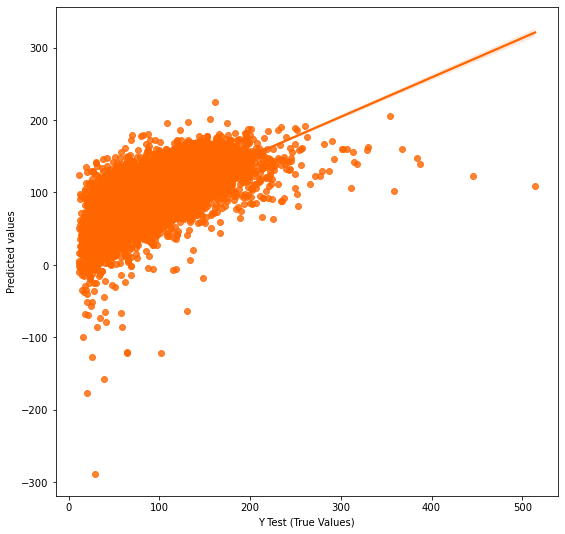

In [183]:
plt.figure(figsize=(9,9))
sns.regplot(x = y_test,y = pred, color='#FF6600')
plt.xlabel('Y Test (True Values)')
plt.ylabel('Predicted values')
plt.show()

In [184]:
reg.score(X_test_final,y_test)

0.4903212634692491

In [214]:
# Calcul des métriques pour y_test
rmse_test_reg = mean_squared_error(y_test, pred, squared=False)


print("\nPerformance sur le jeu de test :")
print(f"  RMSE (Test) : {rmse_test_reg:.2f}")



Performance sur le jeu de test :
  RMSE (Test) : 28.87


In [185]:
coefficients_table=pd.DataFrame({'column':X_train_final.columns,
                                'coefficients':reg.coef_})
coefficients_table=coefficients_table.sort_values(by="coefficients")

Text(0.5, 1.0, 'Normalized coefficients')

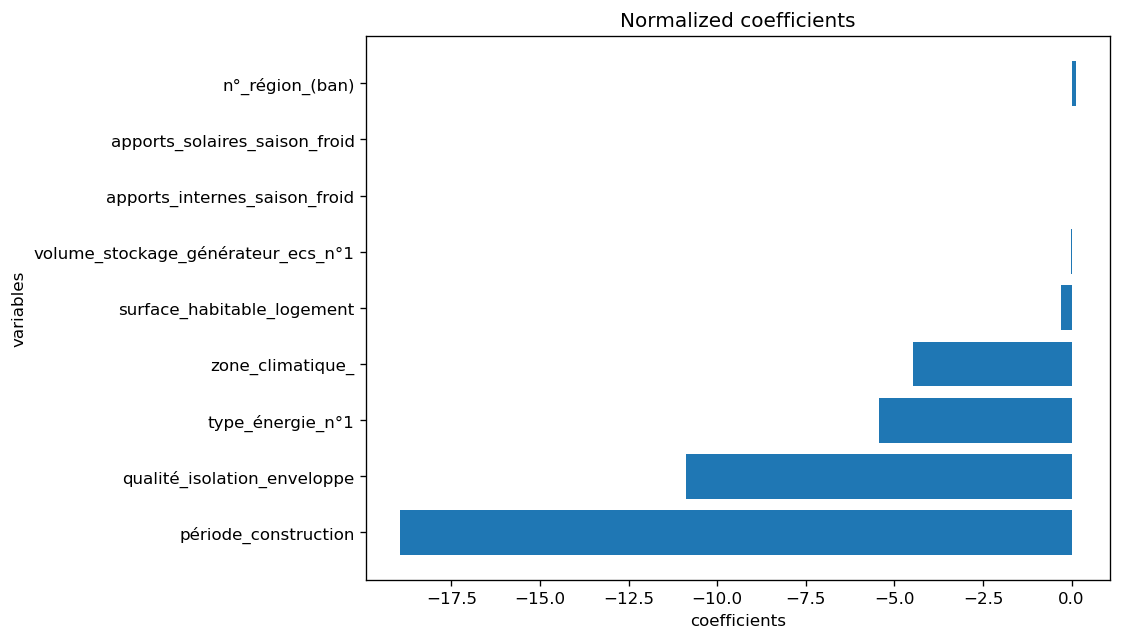

In [186]:
plt.figure(figsize=(8,6),dpi=120)
x=coefficients_table['column']
y=coefficients_table['coefficients']
plt.barh(x,y)
plt.xlabel("coefficients")
plt.ylabel("variables")
plt.title("Normalized coefficients")

Testons avec des données scalées avec standardscaler :

In [187]:
from sklearn.preprocessing import StandardScaler

# Mise à l'échelle des données
scaler = StandardScaler()

# On ajuste le scaler sur les données d'entraînement et on transforme
X_train_scaled = scaler.fit_transform(X_train_final)

# On applique le même scaler sur les données de test
X_test_scaled = scaler.transform(X_test_final)


In [188]:
reg_scaled = LinearRegression()
reg_scaled.fit(X_train_scaled,y_train_noout)

LinearRegression()

In [189]:
reg_scaled.coef_

array([ -9.49209086, -11.60508703, -18.0218601 ,   3.1996009 ,
        -8.86724307,  -8.33696775,   0.        ,   0.        ,
        -3.06484563])

In [190]:
pred_scaled = reg_scaled.predict(X_test_scaled)
pred_scaled

array([ 81.9005695 ,  86.46163944,  72.66956672, ..., 116.42325393,
       103.14035361,  75.60329817])

In [191]:
reg_scaled.score(X_test_scaled,y_test)

0.4903212634692493

In [192]:
# Optionnel : Transformer les résultats en DataFrame pour la lisibilité
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train_final.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test_final.columns)

coefficients_scaled=pd.DataFrame({'column':X_train_scaled_df.columns,
                                'coefficients':reg_scaled.coef_})
coefficients_scaled=coefficients_scaled.sort_values(by="coefficients")

Text(0.5, 1.0, 'Scaled coefficients')

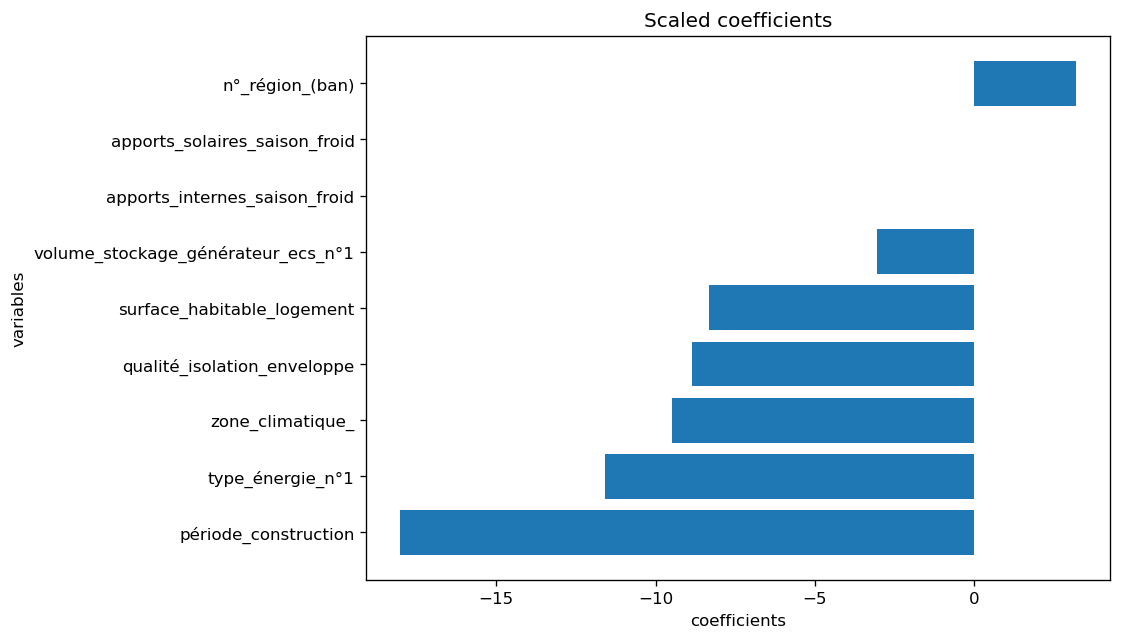

In [193]:
plt.figure(figsize=(8,6),dpi=120)
x=coefficients_scaled['column']
y=coefficients_scaled['coefficients']
plt.barh(x,y)
plt.xlabel("coefficients")
plt.ylabel("variables")
plt.title("Scaled coefficients")

In [209]:
import statsmodels.api as sm

# Prepare data
X = X_train_final
X = sm.add_constant(X)
y = y_train_noout

# Fit the model
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())

                                OLS Regression Results                                
Dep. Variable:     conso_5_usages/m²_é_finale   R-squared:                       0.515
Model:                                    OLS   Adj. R-squared:                  0.515
Method:                         Least Squares   F-statistic:                     8082.
Date:                        Fri, 17 Jan 2025   Prob (F-statistic):               0.00
Time:                                15:28:28   Log-Likelihood:            -2.5189e+05
No. Observations:                       53249   AIC:                         5.038e+05
Df Residuals:                           53241   BIC:                         5.039e+05
Df Model:                                   7                                         
Covariance Type:                    nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


# Test avec un Random Forest Regressor

In [194]:
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error, r2_score


In [195]:
# Create the regressor
regressor = RandomForestRegressor()

# Train the regressor on the training data
regressor.fit(X_train_final, y_train_noout)

# Make predictions on the test set
y_pred = regressor.predict(X_test_final)


In [196]:
# Evaluate the model
score = regressor.score(X_test_final, y_test)

In [197]:
print(score)

0.596514480688725


In [198]:
y_train_pred = regressor.predict(X_train_final)

In [199]:
# Calcul des métriques pour y_train
rmse_train = mean_squared_error(y_train_noout, y_train_pred, squared=False)
r2_train = r2_score(y_train_noout, y_train_pred)

# Calcul des métriques pour y_test
rmse_test = mean_squared_error(y_test, y_pred, squared=False)
r2_test = r2_score(y_test, y_pred)

# Affichage des résultats
print("Performance sur le jeu d'entraînement :")
print(f"  RMSE (Train) : {rmse_train:.2f}")
print(f"  R² (Train) : {r2_train:.2f}")

print("\nPerformance sur le jeu de test :")
print(f"  RMSE (Test) : {rmse_test:.2f}")
print(f"  R² (Test) : {r2_test:.2f}")

Performance sur le jeu d'entraînement :
  RMSE (Train) : 10.33
  R² (Train) : 0.93

Performance sur le jeu de test :
  RMSE (Test) : 25.69
  R² (Test) : 0.60


R² (Train) >> R² (Test) -> OVERFITTING

In [200]:
random_forest = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

# Train the regressor on the training data
random_forest.fit(X_train_final, y_train_noout)

# Make predictions on the train and test set
y_train_pred = random_forest.predict(X_train_final)
y_pred = random_forest.predict(X_test_final)


In [201]:
# Calcul des métriques pour y_train
rmse_train = mean_squared_error(y_train_noout, y_train_pred, squared=False)
r2_train = r2_score(y_train_noout, y_train_pred)

# Calcul des métriques pour y_test
rmse_test = mean_squared_error(y_test, y_pred, squared=False)
r2_test = r2_score(y_test, y_pred)

# Affichage des résultats
print("Performance sur le jeu d'entraînement :")
print(f"  RMSE (Train) : {rmse_train:.2f}")
print(f"  R² (Train) : {r2_train:.2f}")

print("\nPerformance sur le jeu de test :")
print(f"  RMSE (Test) : {rmse_test:.2f}")
print(f"  R² (Test) : {r2_test:.2f}")

Performance sur le jeu d'entraînement :
  RMSE (Train) : 21.81
  R² (Train) : 0.69

Performance sur le jeu de test :
  RMSE (Test) : 24.86
  R² (Test) : 0.62


In [202]:
# Plus d'overfitting !

score = regressor.score(X_test_final, y_test)
print(score)

0.596514480688725


Top 10 des variables les plus importantes :
                              Feature  Importance
2                période_construction    0.358372
1                    type_énergie_n°1    0.322702
5          surface_habitable_logement    0.111200
4         qualité_isolation_enveloppe    0.080929
0                    zone_climatique_    0.055167
8  volume_stockage_générateur_ecs_n°1    0.046059
3                     n°_région_(ban)    0.025570
6       apports_internes_saison_froid    0.000000
7       apports_solaires_saison_froid    0.000000


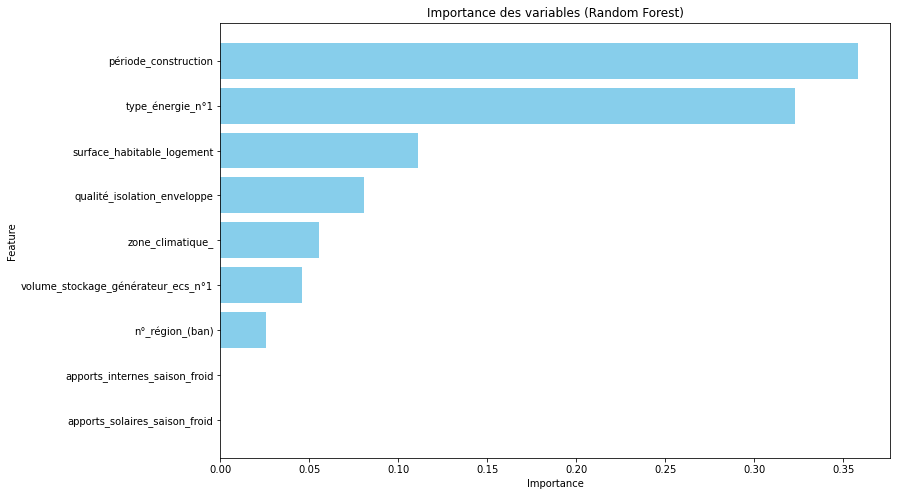

In [203]:
# Récupérer l'importance des variables
importances = random_forest.feature_importances_

# Créer un DataFrame pour organiser les résultats
feature_importance = pd.DataFrame({
    'Feature': X_train_final.columns,
    'Importance': importances
})

# Trier les variables par importance décroissante
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Afficher les 10 variables les plus importantes
print("Top 10 des variables les plus importantes :")
print(feature_importance.head(10))

# Visualisation de l'importance des variables
plt.figure(figsize=(12, 8))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Importance des variables (Random Forest)')
plt.gca().invert_yaxis()  # Inverser l'ordre pour correspondre à l'ordre décroissant
plt.show()

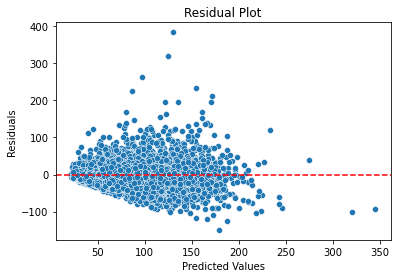

In [212]:
import seaborn as sns

# Résidus
residuals = y_test - y_pred

# Tracé des résidus
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Recommandations

In [215]:
cols = ['période_construction', 'type_énergie_n°1', 'surface_habitable_logement', 'qualité_isolation_enveloppe',
        'zone_climatique_', 'volume_stockage_générateur_ecs_n°1','n°_région_(ban)']

In [216]:
low_consumption_threshold = dpe_final['conso_5_usages/m²_é_finale'].quantile(0.25)
low_consumption = dpe_final[dpe_final['conso_5_usages/m²_é_finale'] <= low_consumption_threshold]

dpe = dpe_final['etiquette_dpe']

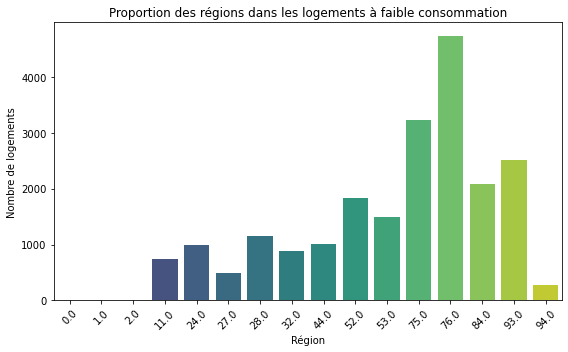

In [223]:
plt.figure(figsize=(8, 5))
region_counts = dpe_final[dpe_final['low_consumption']]['n°_région_(ban)'].value_counts()
sns.barplot(x=region_counts.index, y=region_counts.values, palette="viridis")
plt.title("Proportion des régions dans les logements à faible consommation")
plt.xlabel("Région")
plt.ylabel("Nombre de logements")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

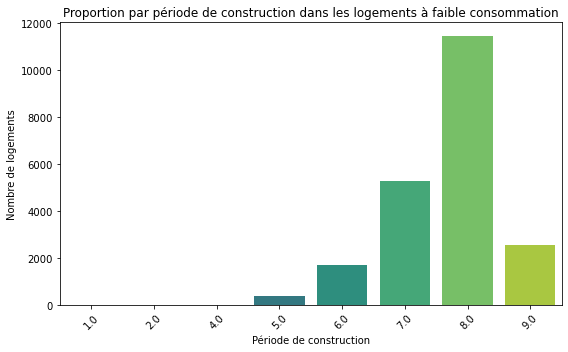

In [224]:
plt.figure(figsize=(8, 5))
region_counts = dpe_final[dpe_final['low_consumption']]['période_construction'].value_counts()
sns.barplot(x=region_counts.index, y=region_counts.values, palette="viridis")
plt.title("Proportion par période de construction dans les logements à faible consommation")
plt.xlabel("Période de construction")
plt.ylabel("Nombre de logements")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

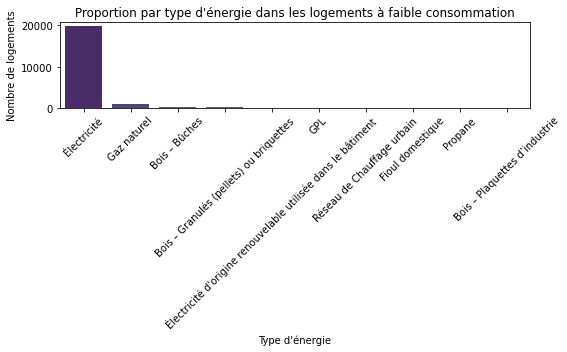

In [225]:
plt.figure(figsize=(8, 5))
region_counts = dpe_final[dpe_final['low_consumption']]['type_énergie_n°1'].value_counts()
sns.barplot(x=region_counts.index, y=region_counts.values, palette="viridis")
plt.title("Proportion par type d'énergie dans les logements à faible consommation")
plt.xlabel("Type d'énergie")
plt.ylabel("Nombre de logements")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

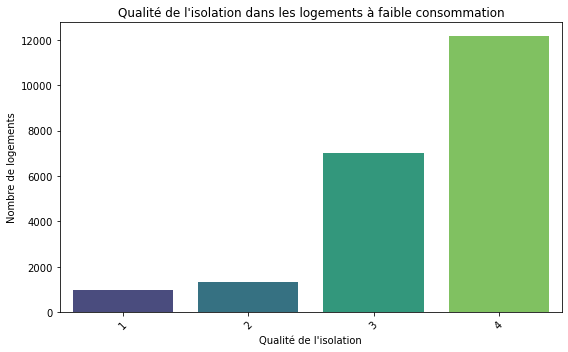

In [227]:
plt.figure(figsize=(8, 5))
region_counts = dpe_final[dpe_final['low_consumption']]['qualité_isolation_enveloppe'].value_counts()
sns.barplot(x=region_counts.index, y=region_counts.values, palette="viridis")
plt.title("Qualité de l'isolation dans les logements à faible consommation")
plt.xlabel("Qualité de l'isolation")
plt.ylabel("Nombre de logements")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

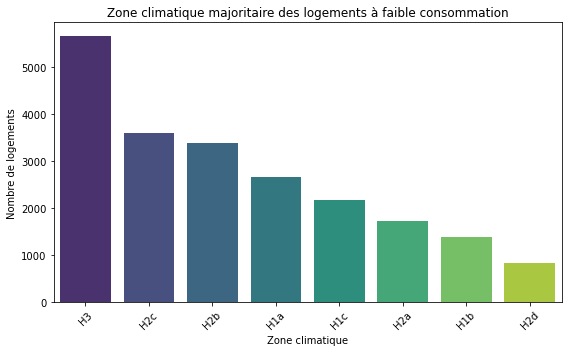

In [228]:
plt.figure(figsize=(8, 5))
region_counts = dpe_final[dpe_final['low_consumption']]['zone_climatique_'].value_counts()
sns.barplot(x=region_counts.index, y=region_counts.values, palette="viridis")
plt.title("Zone climatique majoritaire des logements à faible consommation")
plt.xlabel("Zone climatique")
plt.ylabel("Nombre de logements")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

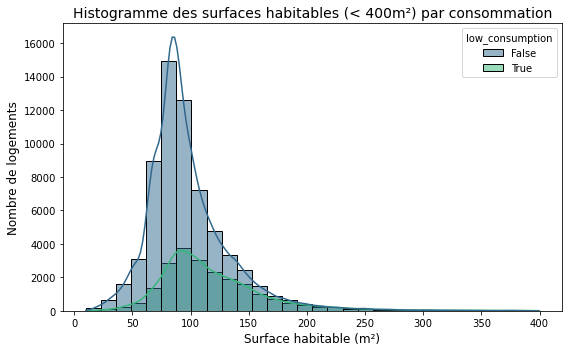

In [230]:
dpe_filtered = dpe_final[dpe_final['surface_habitable_logement'] < 400]

plt.figure(figsize=(8, 5))
sns.histplot(data=dpe_filtered, x='surface_habitable_logement', hue='low_consumption', kde=True, bins=30, palette="viridis")
plt.title("Histogramme des surfaces habitables (< 400m²) par consommation", fontsize=14)
plt.xlabel("Surface habitable (m²)", fontsize=12)
plt.ylabel("Nombre de logements", fontsize=12)
plt.tight_layout()
plt.show()

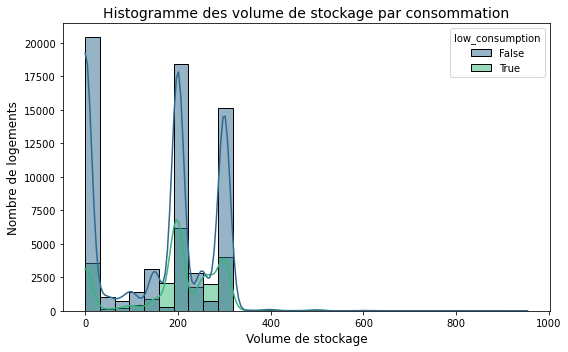

In [232]:
dpe_filtered = dpe_final[dpe_final['volume_stockage_générateur_ecs_n°1'] < 1000]

plt.figure(figsize=(8, 5))
sns.histplot(data=dpe_filtered, x='volume_stockage_générateur_ecs_n°1', hue='low_consumption', kde=True, bins=30, palette="viridis")
plt.title("Histogramme des volume de stockage par consommation", fontsize=14)
plt.xlabel("Volume de stockage", fontsize=12)
plt.ylabel("Nombre de logements", fontsize=12)
plt.tight_layout()
plt.show()